__For testing calibration issues. performed after test2__

# pH Calibration Factors
Includes:

- pH calibration factors for the pH probe
- pH calculation formulas, including temperature compensation
- pH probe calibration procedures
- brief description of the calibration procedures
- a formula to compute the calibration slope and intercept values using basic Python, with a function to verify pH calculations (to have a second verification of the C++ code)

## pH Slope, Intercept, and Approximation Calculation

$$
\begin{aligned}
\text{Slope} &= \frac{1}{2} \left( \frac{7.00 - 4.01}{V_{\text{neutral}} - V_{\text{acid}}} + \frac{7.00 - 10.00}{V_{\text{neutral}} - V_{\text{base}}} \right) \\
\text{Intercept} &= 7.00 - \text{Slope} \times V_{\text{neutral}} \\
\text{CompensatedSlope} &= \text{Slope} \times \frac{T + 273.15}{25.0 + 273.15} \\
\text{pH}_{\text{value}} &= \text{CompensatedSlope} \times V + \text{Intercept}
\end{aligned}
$$


Where:

- slope = initial pH slope calculated using known pH values and the respective voltages as measured by the pH sensor,
- interceptPH = the intercept calculated using the neutral voltage as a reference point
- compensatedSlope = the slope adjusted for temperature variations
- pHValue = the calculated pH value





### 🔧 pH Probe Calibration Procedure

---

#### 1. **Initial Rinse**
- Rinse the **pH probe** with **deionized** or **battery water**.
- Perform **at least 3 rinses** (preferably 7) to ensure the probe is clean.

---

#### 2. **First Calibration – pH 4.0**
- Calibrate using a **pH 4.0 or 4.01 buffer solution**.
- Perform calibration **at least twice** using the provided calibration code.  
> **Note:** This probe has a **screw-on cap**. Fill the cap with the buffer solution, attach it to the probe threads, and begin measurement.

---

#### 3. **Measure and Record**
- Allow the calibration buffer to fill.
- Wait until **50 measurements** have been collected, then record the final value.
> ⚠️The updated script should not display a result until 50 measurements have been collected.

---

#### 4. **Rinse the Probe**
- Repeat the rinsing procedure from **Step 1**.

---

#### 5. **Second Calibration – pH 7.0**
- Repeat the measurement process from **Step 3** using a **pH 7.0 buffer solution**.
- Perform calibration **at least twice**.

---

#### 6. **Rinse the Probe**
- Repeat the rinsing procedure from **Step 1**.

---

#### 7. **Third Calibration – pH 10.0**
- Repeat the measurement process from **Step 3** using a **pH 10.0 buffer solution**.
- Perform calibration **at least twice**.

---

#### 8. **Final Rinse**
- Repeat the rinsing procedure from **Step 1** one last time.

---

#### 9. **Record Calibration Values**
- Write the measured values into your code.
- Assign them to the appropriate variables.

- Note: **_For this test, I measured the calibration solution 5 times, with the system powered off between each measurement. After the 5 tests, I then measured for a 1-hr period. the main purpose for this procedure was to determine the level or rate of sensor drift._**

DFRobot v2.0 pH Probe Voltages

|pH|Volts|Millivolts|
|---|-----|----------|
|0|2.745|2745|
|1|2.570|2570|
|2|2.390|2390|
|3|2.210|2210|
|4|2.030|2030|
|5|1.855|1855|
|6|1.680|1680|
|7|1.500|1500|
|8|1.330|1330|
|9|1.155|1155|
|10|0.975|975|
|11|0.800|800|
|12|0.620|620|
|13|0.445|445|
|14|0.265|265|

---

**Function to save plots as files**

In [1]:
from pathlib import Path
import emoji

IMAGES_PATH = Path() / "images" / "results"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

print(emoji.emojize(":check_mark_button:"))

✅


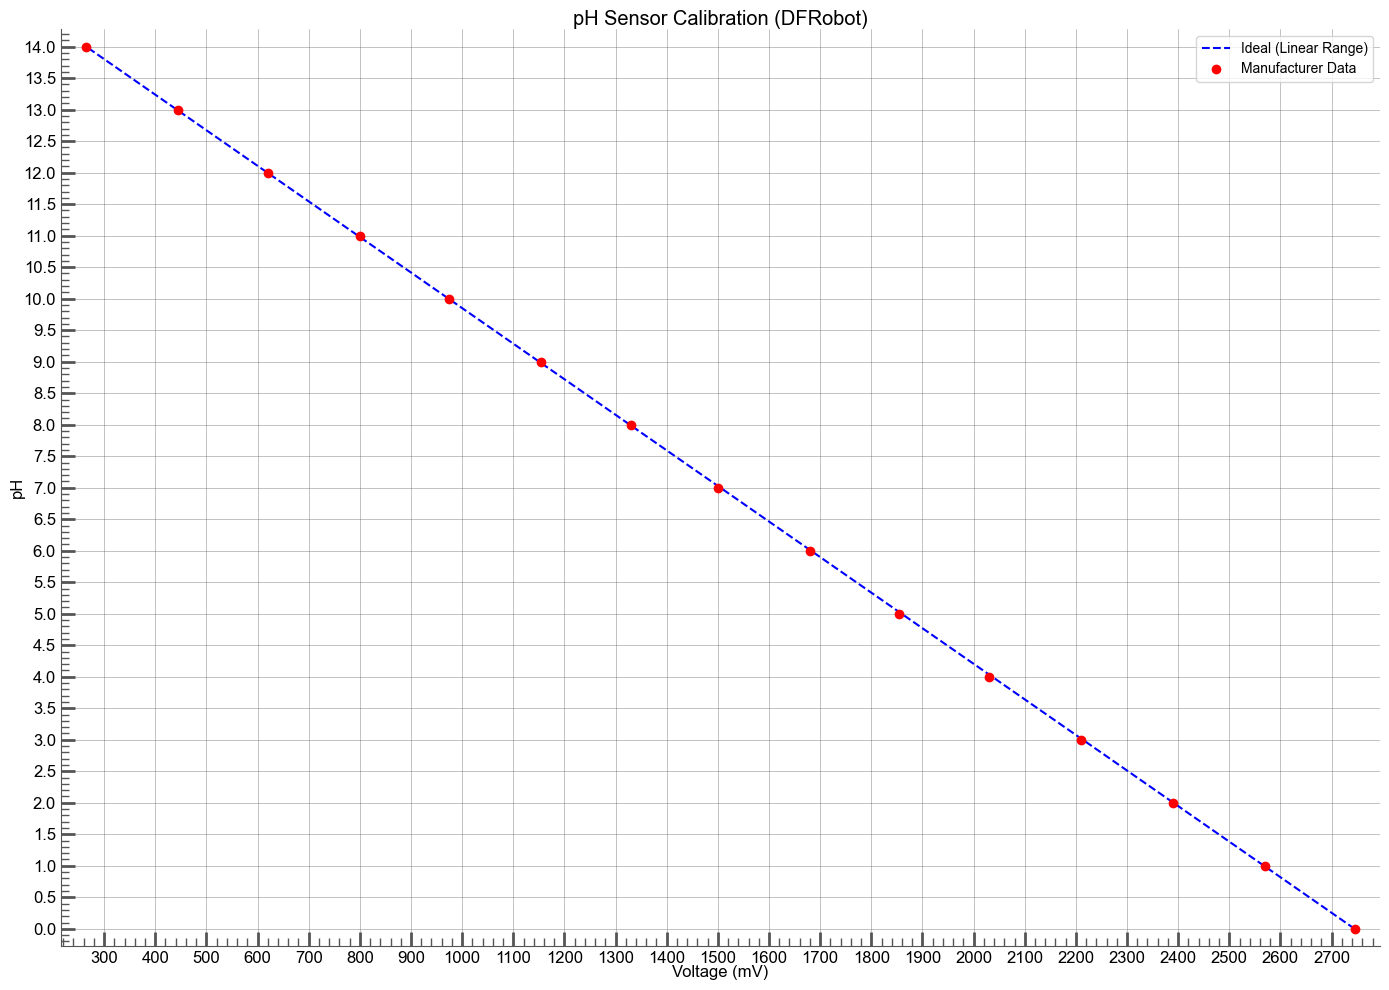

<Figure size 640x480 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

# Manufacturer's data
DFRobot_voltages = np.array([2745, 2570, 2390, 2210, 2030, 1855, 1680, 1500, 1330, 1155, 975, 800, 620, 445, 265])
DFRobot_ph = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

# Plot the data
from aquarel import load_theme
theme = load_theme("scientific")
theme.apply()

plt.figure(figsize=(14, 10))

# Plot ideal calibration line
plt.plot([2745, 265], [0, 14], 'b--', label='Ideal (Linear Range)')

# Plot DFRobot measured data points
plt.plot(DFRobot_voltages, DFRobot_ph, 'ro', label='Manufacturer Data')

plt.xlabel('Voltage (mV)')
plt.ylabel('pH')
plt.title('pH Sensor Calibration (DFRobot)')
plt.legend()
plt.grid(True)

# Set finer ticks
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(100))  # every 100 mV
ax.yaxis.set_major_locator(MultipleLocator(0.5))  # every 0.5 pH unit

plt.tight_layout()
save_fig("pH_sensor_manufacturer_values", tight_layout=True, fig_extension="png", resolution=300)
plt.show()

theme.apply_transforms()


# pH Calibration Testing

- Calibrate with each solution, 1 at a time.
- Separate measuring time by 10 minutes, and perform 5 tests.
    - This is to determine if the probe is inconsistent betwen power cycles.
    - Plot the points using a scatterplot.
    - We will take the average of the voltage for the final final.
- Once separate measurements are completed, use new calibration solution and measure for one hour.
- This is to determine if the probe is consistent over time.
- Calibration liquids are at room temperature - any temperatures indicated here are room temp only (ambient). Liquid temperatures are between 22 ºC - 25 ºC, and are placed in a calibration probe cap when measured. The cap is threaded onto the probe, and the electrode is submerged. 


Remember: Because we are using a 10kOhm Resistor, the voltage values are read at half of what they actually are. The calibration script takes 50 measurements, then calculates the median.

We will record the 5 values below in a markdown cell (as well as save the serial logs for each measurement to the folder). The one hour sample will be saved to a serial port log file, and attached to this folder.

Additional Notes:

- The acid calibration solution was not dated.
- The basic solution was dated opened on October 2024.
- Voltage measurement increased by 16.5 mV partway through the test.

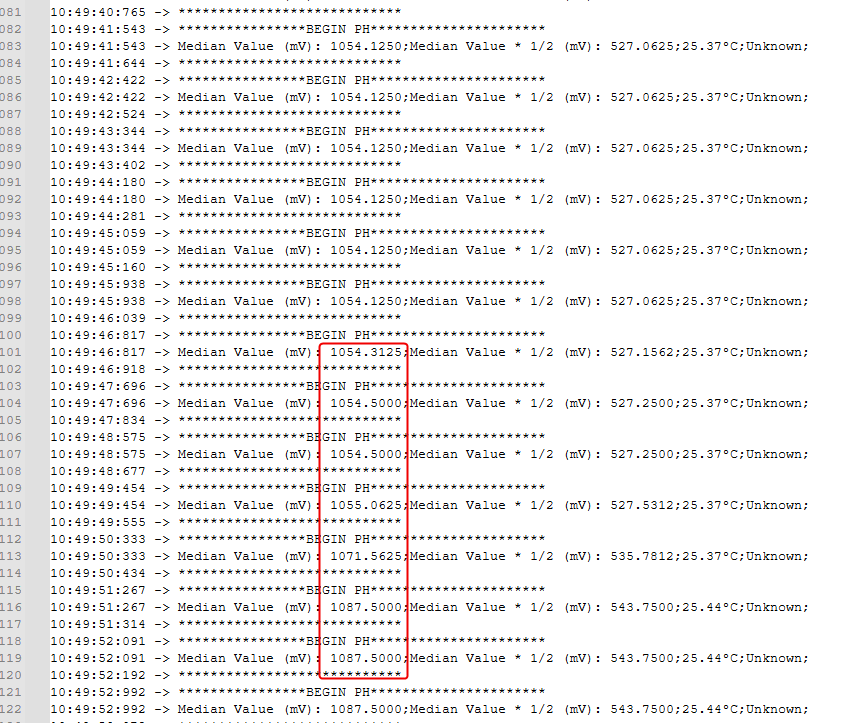


## 📋 Recorded Values

---

### 🧪 Acid Results

- After 3 measures, I replaced approximately **40–50%** of the calibration solution.

| Time  | Date      | Median (mV) | Median × ½ (mV) | Note    |
|-------|-----------|-------------|------------------|---------|
| 11:23 | 16.04.25  | 2059.5000   | 1029.7500        | Acidic  |
| 11:34 | 16.04.25  | 2062.8750   | 1031.4375        | Acidic  |
| 11:45 | 16.04.25  | 2064.7500   | 1032.3750        | Acidic  |
| 11:57 | 16.04.25  | 2062.5000   | 1031.2500        | Acidic  |
| 12:07 | 16.04.25  | 2063.2500   | 1031.6250        | Acidic  |

**_Recorded Acid Voltage from Test 1 Calibration:_** 2041.88  
**_Recorded Acid Voltage from Test 2 Calibration:_** 2086.00  
**_Recorded Acid Voltage from Calibration 3:_** **2062.575** ⬅️ *Mean of the 5 measurements*

---

### 🧪 Base Results

- After 1st measure: Rinsed the probe 3× in basic solution, replaced ~40–50% of calibration solution.  
- After 4th measure: Rinsed again 3× in basic solution, replaced ~40–50% of solution.

| Time  | Date      | Median (mV) | Median × ½ (mV) | Note     |
|-------|-----------|-------------|------------------|----------|
| 09:20 | 17.04.25  | 1105.5000   | 552.7500         | Unknown  |
| 09:33 | 17.04.25  | 1054.1250   | 527.0625         | Unknown  |
| 09:44 | 17.04.25  | 1053.5625   | 526.7812         | Unknown  |
| 10:07 | 17.04.25  | 1053.7500   | 526.8750         | Unknown  |
| 10:19 | 17.04.25  | 1053.7500   | 526.8750         | Unknown  |
| 10:30 | 17.04.25  | 1054.1250   | 527.0625         | Unknown  |

**_Recorded Base Voltage from Test 1 Calibration:_** 1104.00  
**_Recorded Base Voltage from Test 2 Calibration:_** 1123.50  
**_Recorded Base Voltage from Calibration 3:_** **1062.46875** ⬅️ *Mean of the 6 measurements*

---

### 🧪 Neutral Results

- After 3 measures, I replaced approximately **40–50%** of the calibration solution.

| Time  | Date      | Median (mV) | Median × ½ (mV) | Temp (°C) | Note     |
|-------|-----------|-------------|------------------|-----------|----------|
| 12:02 | 17.04.25  | 1535.2500   | 767.6250         | 24.19     | Neutral  |
| 12:13 | 17.04.25  | 1536.3750   | 768.1875         | 23.81     | Neutral  |
| 12:24 | 17.04.25  | 1537.1250   | 768.5625         | 23.69     | Neutral  |
| 12:37 | 17.04.25  | 1537.5000   | 768.7500         | 23.62     | Neutral  |
| 12:52 | 17.04.25  | 1536.3750   | 768.1875         | 23.81     | Neutral  |

**_Recorded Base Voltage from Test 1 Calibration:_** 1568.24  
**_Recorded Base Voltage from Test 2 Calibration:_** 1577.82  
**_Recorded Base Voltage from Calibration 3:_** **1536.525** ⬅️ *Mean of the 5 measurements*

---



In [3]:
import numpy as np

neutral_array_temp = np.array([1568.24, 1577.82, 1536.525])
base_array_temp = np.array([1104.00, 1123.50, 1062.47])
acid_array_temp = np.array([2041.88, 2086.00, 2062.58])

print(f' Standard deviation between pH neutral voltages: {np.std(neutral_array_temp):.3f}\n', 
      f'Standard deviation between pH base voltages: {np.std(base_array_temp):.3f}\n',
      f'Standard deviation between pH acid voltages: {np.std(acid_array_temp):.3f}\n')

print(f' Mean of pH neutral voltages: {np.mean(neutral_array_temp):.3f}\n',
        f'Mean of pH base voltages: {np.mean(base_array_temp):.3f}\n',
        f'Mean of pH acid voltages: {np.mean(acid_array_temp):.3f}\n')

print(f' Variance between pH neutral voltages: {np.var(neutral_array_temp):.3f}\n', 
      f'Variance between pH base voltages: {np.var(base_array_temp):.3f}\n',
      f'Variance between pH acid voltages: {np.var(acid_array_temp):.3f}\n')



 Standard deviation between pH neutral voltages: 17.647
 Standard deviation between pH base voltages: 25.451
 Standard deviation between pH acid voltages: 18.023

 Mean of pH neutral voltages: 1560.862
 Mean of pH base voltages: 1096.657
 Mean of pH acid voltages: 2063.487

 Variance between pH neutral voltages: 311.433
 Variance between pH base voltages: 647.739
 Variance between pH acid voltages: 324.840



### Histogram

1-hour neutral test variance: 0.1794089712781498
            Median
count  4193.000000
mean   1537.376356
std       0.423617
min    1536.375000
25%    1537.125000
50%    1537.500000
75%    1537.875000
max    1537.875000


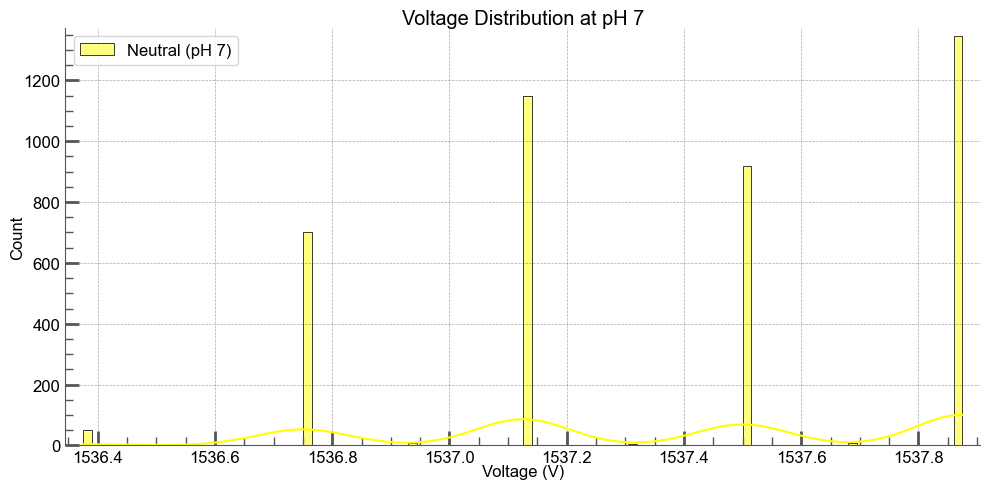

In [4]:
# Neutral Test Density - 1-Hour measurement
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv("neutral/1-hour-test/cleaned for numpy/COM4_2025_04_17.12.53.20.197.csv", sep=';')
_1HOUR_neutral_test = df['Median'].to_numpy()
_1HOUR_neutral_test_mean = np.mean(_1HOUR_neutral_test)
_1HOUR_neutral_test_var = np.var(_1HOUR_neutral_test)
print("1-hour neutral test variance:",_1HOUR_neutral_test_var)
print(df.describe())

# Plot the calibration points

from aquarel import load_theme
theme = load_theme("scientific")
theme.apply()

# Set the figure size
plt.figure(figsize=(10, 5))

sns.histplot(_1HOUR_neutral_test, bins=100, kde=True, stat="count", color="yellow", edgecolor="black", label="Neutral (pH 7)")

plt.xlabel("Voltage (V)")

# Title
plt.title("Voltage Distribution at pH 7")

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Legend
plt.legend(fontsize=12, loc='best', frameon=True)

# Optional: tighter layout
plt.tight_layout()

# Save the figure
save_fig("pH_sensor_neutral_1HOUR_test_data_histogram_plot", tight_layout=True, fig_extension="png", resolution=300)

# Show the plot
plt.show()

theme.apply_transforms()

1-hour base test variance: 186.7957925237749
            Median
count  4269.000000
mean   1078.231158
std      13.668927
min    1053.750000
25%    1085.250000
50%    1085.625000
75%    1086.000000
max    1087.500000


<Figure size 640x480 with 0 Axes>

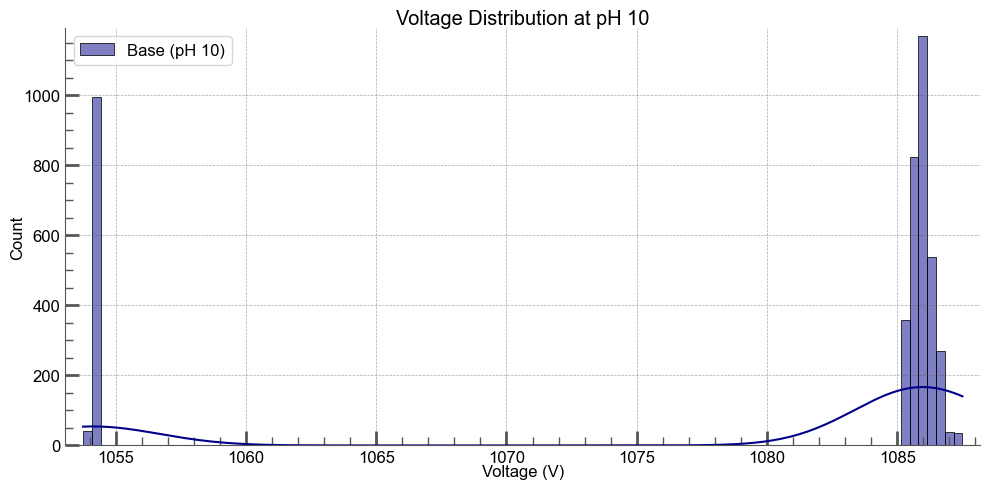

In [5]:
# Base Test Density - 1-Hour measurement
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv("base/1-hour-test/cleaned for numpy/COM4_2025_04_17.10.34.01.939.csv", sep=';')
_1HOUR_base_test = df['Median'].to_numpy()
_1HOUR_base_test_var = np.var(_1HOUR_base_test)
_1HOUR_base_test_mean = np.mean(_1HOUR_base_test)
print("1-hour base test variance:",_1HOUR_base_test_var)
print(df.describe())

# Plot the calibration points

from aquarel import load_theme
theme = load_theme("scientific")
theme.apply()

# Set the figure size
plt.figure(figsize=(10, 5))

sns.histplot(_1HOUR_base_test, bins=100, kde=True, stat="count", color="darkblue", edgecolor="black", label="Base (pH 10)")

plt.xlabel("Voltage (V)")

# Title
plt.title("Voltage Distribution at pH 10")

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Legend
plt.legend(fontsize=12, loc='best', frameon=True)

# Optional: tighter layout
plt.tight_layout()

# Save the figure
save_fig("pH_sensor_basic_1HOUR_test_data_histogram_plot", tight_layout=True, fig_extension="png", resolution=300)

# Show the plot
plt.show()

theme.apply_transforms()

1-hour acid test variance: 0.32666675950791113
            Median
count  4150.000000
mean   2063.550181
std       0.571617
min    2061.375000
25%    2063.250000
50%    2064.000000
75%    2064.000000
max    2064.000000


<Figure size 640x480 with 0 Axes>

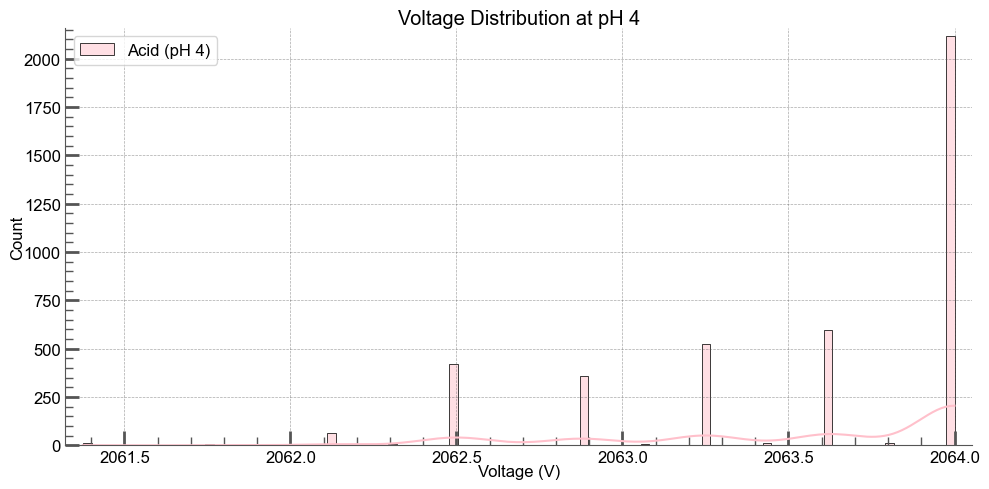

In [6]:
# Acid Test Density - 1-Hour measurement
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("acid/1-hour-test/cleaned for numpy/COM4_2025_04_16.12.17.51.713.csv", sep=';')
_1HOUR_acid_test = df['Median'].to_numpy()
_1HOUR_acid_test_mean = np.mean(_1HOUR_acid_test)
_1HOUR_acid_test_var = np.var(_1HOUR_acid_test)
print("1-hour acid test variance:",_1HOUR_acid_test_var)
print(df.describe())

# Plot the calibration points

from aquarel import load_theme
theme = load_theme("scientific")
theme.apply()

# Set the figure size
plt.figure(figsize=(10, 5))
sns.histplot(_1HOUR_acid_test, bins=100, kde=True, stat="count", color="pink", edgecolor="black", label="Acid (pH 4)")

plt.xlabel("Voltage (V)")

# Title
plt.title("Voltage Distribution at pH 4")


# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Legend
plt.legend(fontsize=12, loc='best', frameon=True)

# Optional: tighter layout
plt.tight_layout()

# Save the figure
save_fig("pH_sensor_acid_1HOUR_test_data_density_plots", tight_layout=True, fig_extension="png", resolution=300)

# Show the plot
plt.show()

theme.apply_transforms()

### KDE Density Plots

1-hour neutral test variance: 0.1794089712781498
            Median
count  4193.000000
mean   1537.376356
std       0.423617
min    1536.375000
25%    1537.125000
50%    1537.500000
75%    1537.875000
max    1537.875000


<Figure size 640x480 with 0 Axes>

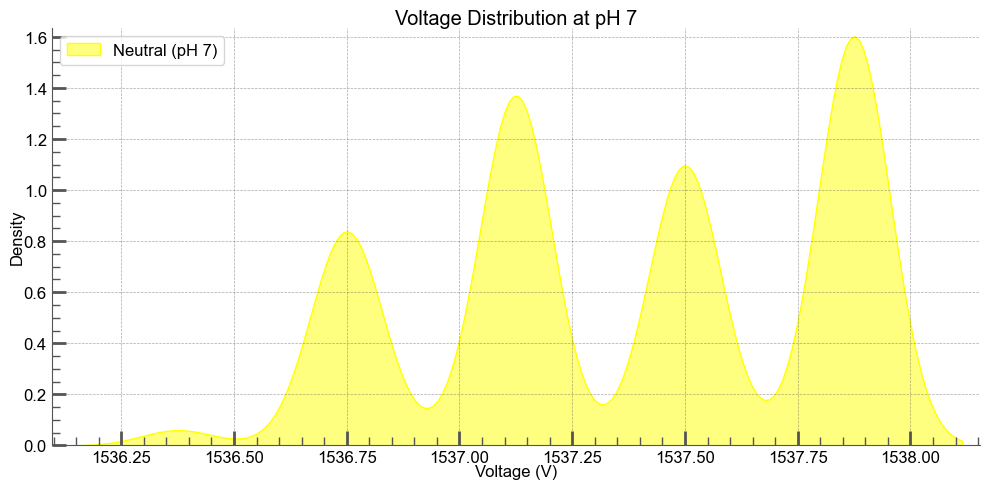

In [7]:
# Neutral Test Density - 1-Hour measurement
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv("neutral/1-hour-test/cleaned for numpy/COM4_2025_04_17.12.53.20.197.csv", sep=';')
_1HOUR_neutral_test = df['Median'].to_numpy()
_1HOUR_neutral_test_mean = np.mean(_1HOUR_neutral_test)
_1HOUR_neutral_test_var = np.var(_1HOUR_neutral_test)
print("1-hour neutral test variance:",_1HOUR_neutral_test_var)
print(df.describe())

# Plot the calibration points

from aquarel import load_theme
theme = load_theme("scientific")
theme.apply()

# Set the figure size
plt.figure(figsize=(10, 5))

sns.kdeplot(_1HOUR_neutral_test, label="Neutral (pH 7)", color="yellow", fill=True, alpha=0.5)

plt.xlabel("Voltage (V)")

# Title
plt.title("Voltage Distribution at pH 7")

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Legend
plt.legend(fontsize=12, loc='best', frameon=True)

# Optional: tighter layout
plt.tight_layout()

# Save the figure
save_fig("pH_sensor_neutral_1HOUR_test_data_density_plot", tight_layout=True, fig_extension="png", resolution=300)

# Show the plot
plt.show()

theme.apply_transforms()

1-hour base test variance: 186.7957925237749
            Median
count  4269.000000
mean   1078.231158
std      13.668927
min    1053.750000
25%    1085.250000
50%    1085.625000
75%    1086.000000
max    1087.500000


<Figure size 640x480 with 0 Axes>

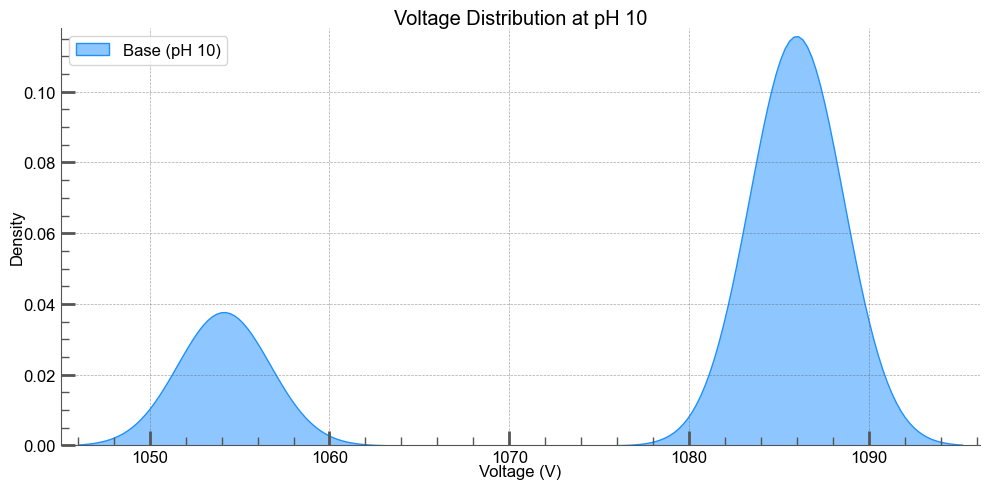

In [8]:
# Base Test Density - 1-Hour measurement
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv("base/1-hour-test/cleaned for numpy/COM4_2025_04_17.10.34.01.939.csv", sep=';')
_1HOUR_base_test = df['Median'].to_numpy()
_1HOUR_base_test_var = np.var(_1HOUR_base_test)
_1HOUR_base_test_mean = np.mean(_1HOUR_base_test)
print("1-hour base test variance:",_1HOUR_base_test_var)
print(df.describe())

# Plot the calibration points

from aquarel import load_theme
theme = load_theme("scientific")
theme.apply()

# Set the figure size
plt.figure(figsize=(10, 5))

sns.kdeplot(_1HOUR_base_test, label="Base (pH 10)", color="dodgerblue", fill=True, alpha=0.5)

plt.xlabel("Voltage (V)")

# Title
plt.title("Voltage Distribution at pH 10")

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Legend
plt.legend(fontsize=12, loc='best', frameon=True)

# Optional: tighter layout
plt.tight_layout()

# Save the figure
save_fig("pH_sensor_basic_1HOUR_test_data_density_plot", tight_layout=True, fig_extension="png", resolution=300)

# Show the plot
plt.show()

theme.apply_transforms()

1-hour acid test variance: 0.32666675950791113
            Median
count  4150.000000
mean   2063.550181
std       0.571617
min    2061.375000
25%    2063.250000
50%    2064.000000
75%    2064.000000
max    2064.000000


<Figure size 640x480 with 0 Axes>

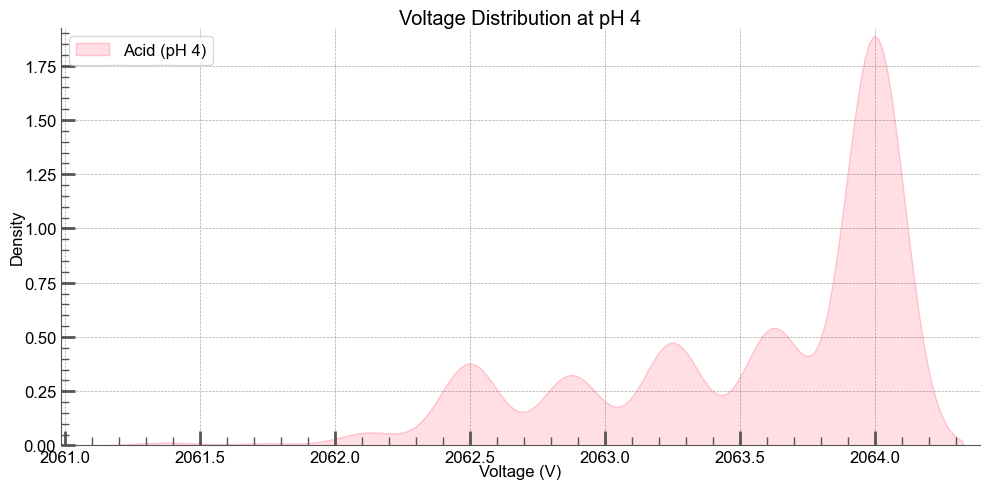

In [9]:
# Acid Test Density - 1-Hour measurement
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("acid/1-hour-test/cleaned for numpy/COM4_2025_04_16.12.17.51.713.csv", sep=';')
_1HOUR_acid_test = df['Median'].to_numpy()
_1HOUR_acid_test_mean = np.mean(_1HOUR_acid_test)
_1HOUR_acid_test_var = np.var(_1HOUR_acid_test)
print("1-hour acid test variance:",_1HOUR_acid_test_var)
print(df.describe())

# Plot the calibration points

from aquarel import load_theme
theme = load_theme("scientific")
theme.apply()

# Set the figure size
plt.figure(figsize=(10, 5))
sns.kdeplot(_1HOUR_acid_test, label="Acid (pH 4)", color="pink", fill=True, alpha=0.5)

plt.xlabel("Voltage (V)")

# Title
plt.title("Voltage Distribution at pH 4")


# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Legend
plt.legend(fontsize=12, loc='best', frameon=True)

# Optional: tighter layout
plt.tight_layout()

# Save the figure
save_fig("pH_sensor_acid_1HOUR_test_data_density_plots", tight_layout=True, fig_extension="png", resolution=300)

# Show the plot
plt.show()

theme.apply_transforms()

### Density + Histogram Overlay

Neutral (pH 7) variance: 0.1794089712781498
            Median
count  4193.000000
mean   1537.376356
std       0.423617
min    1536.375000
25%    1537.125000
50%    1537.500000
75%    1537.875000
max    1537.875000


<Figure size 640x480 with 0 Axes>

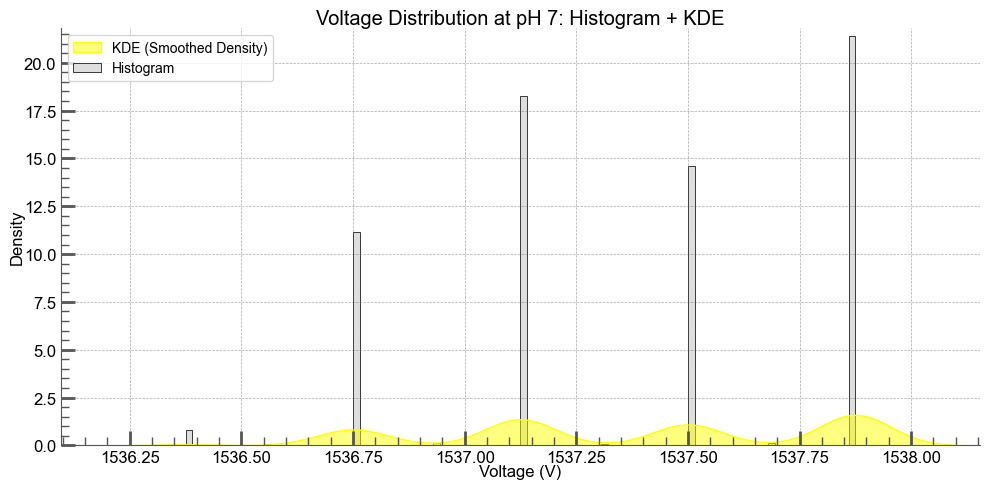

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from aquarel import load_theme

# Load Neutral data
df = pd.read_csv("neutral/1-hour-test/cleaned for numpy/COM4_2025_04_17.12.53.20.197.csv", sep=';')
_1HOUR_neutral_test = df['Median'].to_numpy()

# Calculate statistics
mean = np.mean(_1HOUR_neutral_test)
var = np.var(_1HOUR_neutral_test)
print("Neutral (pH 7) variance:", var)
print(df.describe())

# Load and apply the theme
theme = load_theme("scientific")
theme.apply()

# Plot
plt.figure(figsize=(10, 5))

# Histogram (normalized to form a probability density)
sns.histplot(_1HOUR_neutral_test, bins=100, kde=False, stat="density", color="lightgray", edgecolor="black", label="Histogram")

# KDE overlay
sns.kdeplot(_1HOUR_neutral_test, label="KDE (Smoothed Density)", color="yellow", fill=True, alpha=0.5)

# Add labels, title, grid
plt.xlabel("Voltage (V)")
plt.ylabel("Density")
plt.title("Voltage Distribution at pH 7: Histogram + KDE")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.tight_layout()
save_fig("pH7_histogram_kde_overlay", tight_layout=True, fig_extension="png", resolution=300)
plt.show()

theme.apply_transforms()


Base (pH 10) variance: 186.7957925237749
            Median
count  4269.000000
mean   1078.231158
std      13.668927
min    1053.750000
25%    1085.250000
50%    1085.625000
75%    1086.000000
max    1087.500000


<Figure size 640x480 with 0 Axes>

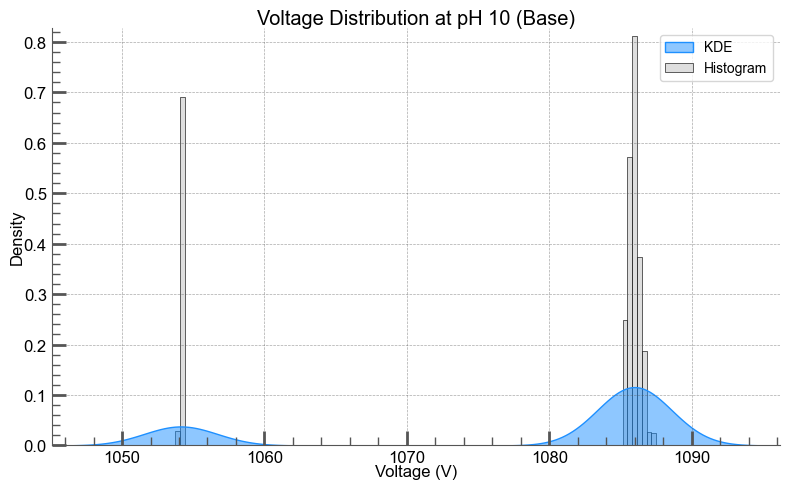

In [11]:
# Base Test Density and Histogram - 1-Hour measurement
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from aquarel import load_theme

# Load Base data
df_base = pd.read_csv("base/1-hour-test/cleaned for numpy/COM4_2025_04_17.10.34.01.939.csv", sep=';')
base_data = df_base['Median'].to_numpy()

# Calculate statistics
print("Base (pH 10) variance:", np.var(base_data))
print(df_base.describe())

# Load and apply the theme
theme = load_theme("scientific")
theme.apply()

# Plot
plt.figure(figsize=(8, 5))

# Histogram (normalized to form a probability density)
sns.histplot(base_data, bins=100, stat="density", color="lightgray", edgecolor="black", label="Histogram")

# KDE overlay
sns.kdeplot(base_data, label="KDE", color="dodgerblue", fill=True, alpha=0.5)

# Add labels, title, grid
plt.title("Voltage Distribution at pH 10 (Base)")
plt.xlabel("Voltage (V)")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.tight_layout()
save_fig("pH10_base_histogram_kde_overlay", tight_layout=True, fig_extension="png", resolution=300)
plt.show()

theme.apply_transforms()


Acid (pH 4) variance: 0.32666675950791113
            Median
count  4150.000000
mean   2063.550181
std       0.571617
min    2061.375000
25%    2063.250000
50%    2064.000000
75%    2064.000000
max    2064.000000


<Figure size 640x480 with 0 Axes>

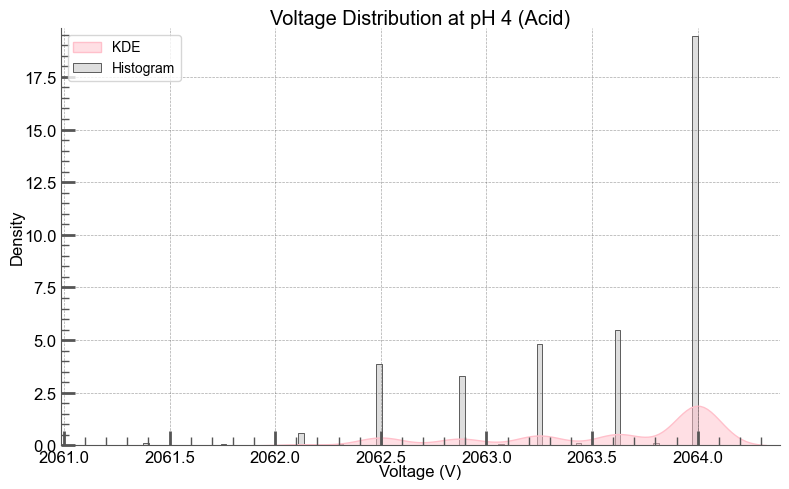

In [12]:
# Acid Test Density - Histogram - 1-Hour measurement
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from aquarel import load_theme

# Load Acid data
df_acid = pd.read_csv("acid/1-hour-test/cleaned for numpy/COM4_2025_04_16.12.17.51.713.csv", sep=';')
acid_data = df_acid['Median'].to_numpy()

# Calculate statistics
print("Acid (pH 4) variance:", np.var(acid_data))
print(df_acid.describe())

# Load and apply theme
theme = load_theme("scientific")
theme.apply()

# Plot
plt.figure(figsize=(8, 5))

# Histogram (normalized to form a probability density)
sns.histplot(acid_data, bins=100, stat="density", color="lightgray", edgecolor="black", label="Histogram")

# KDE overlay
sns.kdeplot(acid_data, label="KDE", color="pink", fill=True, alpha=0.5)

# Add labels, title, grid
plt.title("Voltage Distribution at pH 4 (Acid)")
plt.xlabel("Voltage (V)")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.tight_layout()
save_fig("pH4_acid_histogram_kde_overlay", tight_layout=True, fig_extension="png", resolution=300)
plt.show()

theme.apply_transforms()


### Side-by-Side Plot of Each

Acid (pH 4) variance: 0.32666675950791113
            Median
count  4150.000000
mean   2063.550181
std       0.571617
min    2061.375000
25%    2063.250000
50%    2064.000000
75%    2064.000000
max    2064.000000
Neutral (pH 7) variance: 0.1794089712781498
            Median
count  4193.000000
mean   1537.376356
std       0.423617
min    1536.375000
25%    1537.125000
50%    1537.500000
75%    1537.875000
max    1537.875000
Base (pH 10) variance: 186.7957925237749
            Median
count  4269.000000
mean   1078.231158
std      13.668927
min    1053.750000
25%    1085.250000
50%    1085.625000
75%    1086.000000
max    1087.500000


<Figure size 640x480 with 0 Axes>

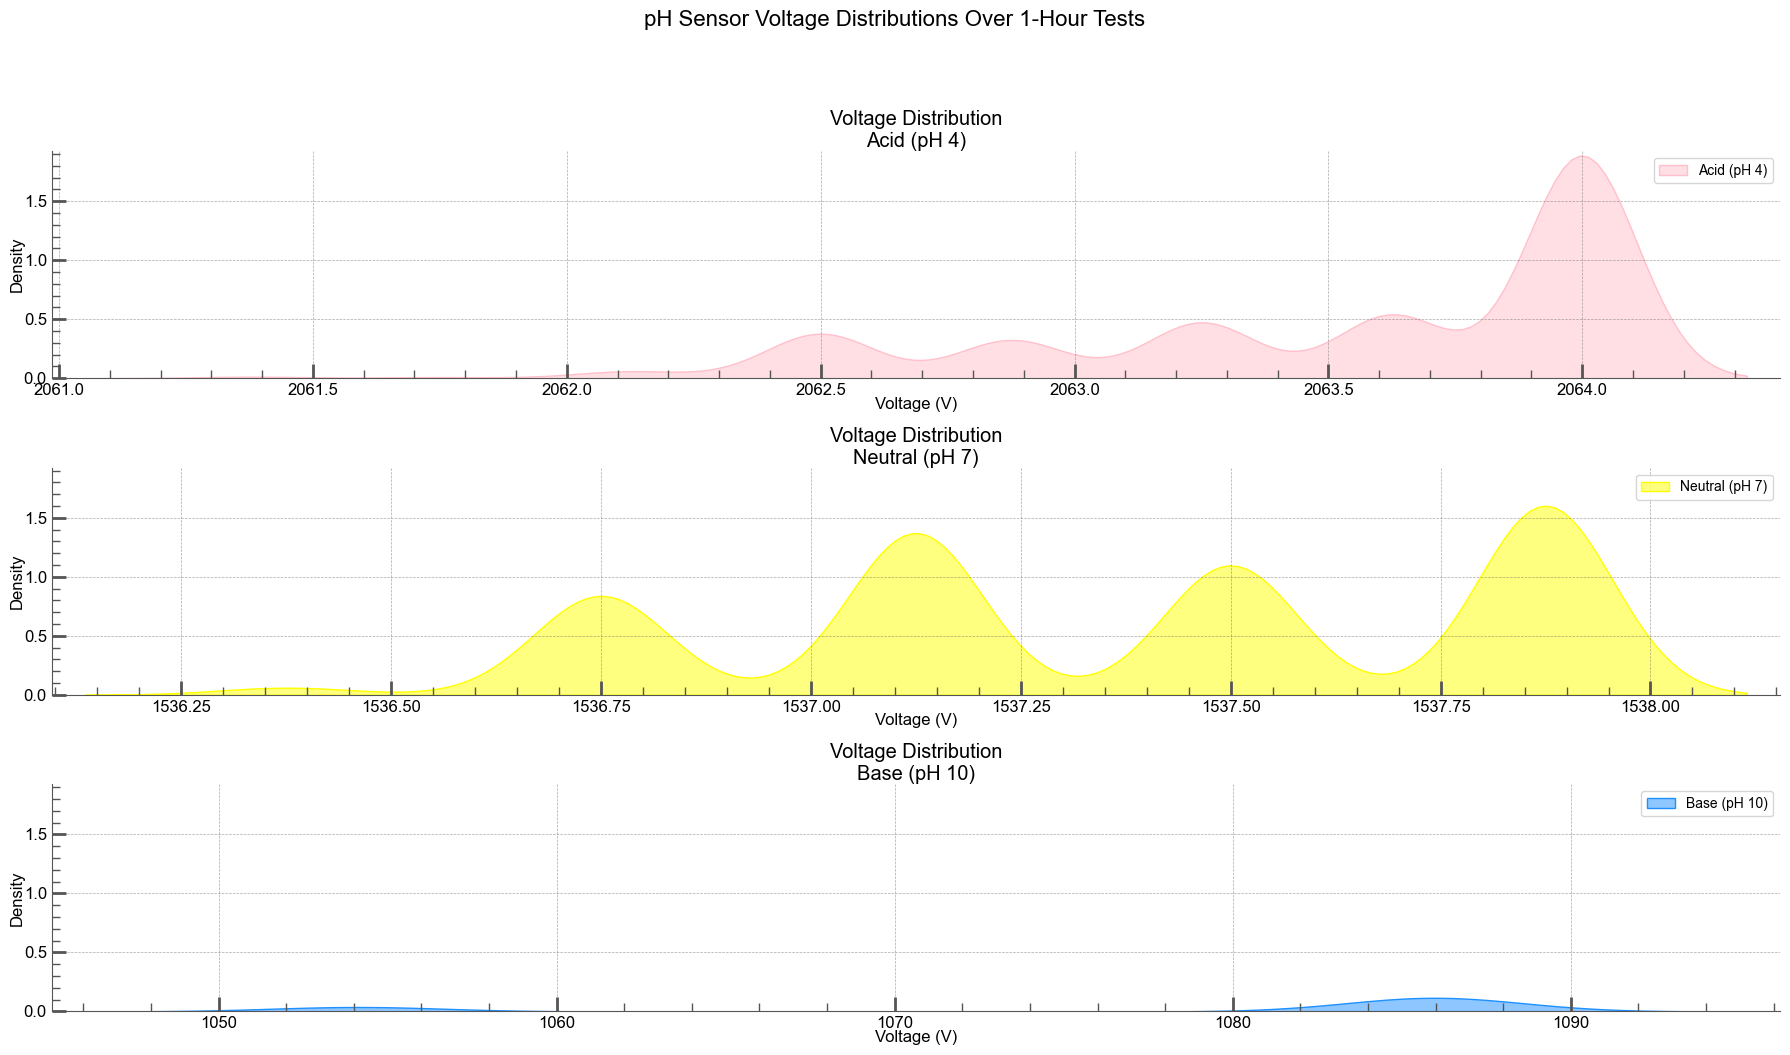

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from aquarel import load_theme

# Apply scientific theme
theme = load_theme("scientific")
theme.apply()

# File paths and labels
tests = [
    {
        "file": "acid/1-hour-test/cleaned for numpy/COM4_2025_04_16.12.17.51.713.csv",
        "label": "Acid (pH 4)",
        "color": "pink"
    },
    {
        "file": "neutral/1-hour-test/cleaned for numpy/COM4_2025_04_17.12.53.20.197.csv",
        "label": "Neutral (pH 7)",
        "color": "yellow"
    },
    {
        "file": "base/1-hour-test/cleaned for numpy/COM4_2025_04_17.10.34.01.939.csv",
        "label": "Base (pH 10)",
        "color": "dodgerblue"
    }
]

# Set up subplots
fig, axes = plt.subplots(3, 1, figsize=(18, 10), sharey=True)

for ax, test in zip(axes, tests):
    df = pd.read_csv(test["file"], sep=';')
    data = df['Median'].to_numpy()
    
    mean = np.mean(data)
    var = np.var(data)
    print(f"{test['label']} variance:", var)
    print(df.describe())
    
    sns.kdeplot(data, label=test["label"], color=test["color"], fill=True, alpha=0.5, ax=ax)
    ax.set_title(f"Voltage Distribution\n{test['label']}")
    ax.set_xlabel("Voltage (V)")
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(fontsize=10)

# Y-axis label only on the first plot
axes[0].set_ylabel("Density")

plt.tight_layout()
plt.suptitle("pH Sensor Voltage Distributions Over 1-Hour Tests", fontsize=16, y=1.05)

# Save figure
save_fig("pH_sensor_all__1HOUR_test_density_plots", tight_layout=True, fig_extension="png", resolution=300)

plt.show()
theme.apply_transforms()


Acid (pH 4) variance: 0.326667
            Median
count  4150.000000
mean   2063.550181
std       0.571617
min    2061.375000
25%    2063.250000
50%    2064.000000
75%    2064.000000
max    2064.000000
Neutral (pH 7) variance: 0.179409
            Median
count  4193.000000
mean   1537.376356
std       0.423617
min    1536.375000
25%    1537.125000
50%    1537.500000
75%    1537.875000
max    1537.875000
Base (pH 10) variance: 186.795793
            Median
count  4269.000000
mean   1078.231158
std      13.668927
min    1053.750000
25%    1085.250000
50%    1085.625000
75%    1086.000000
max    1087.500000


<Figure size 640x480 with 0 Axes>

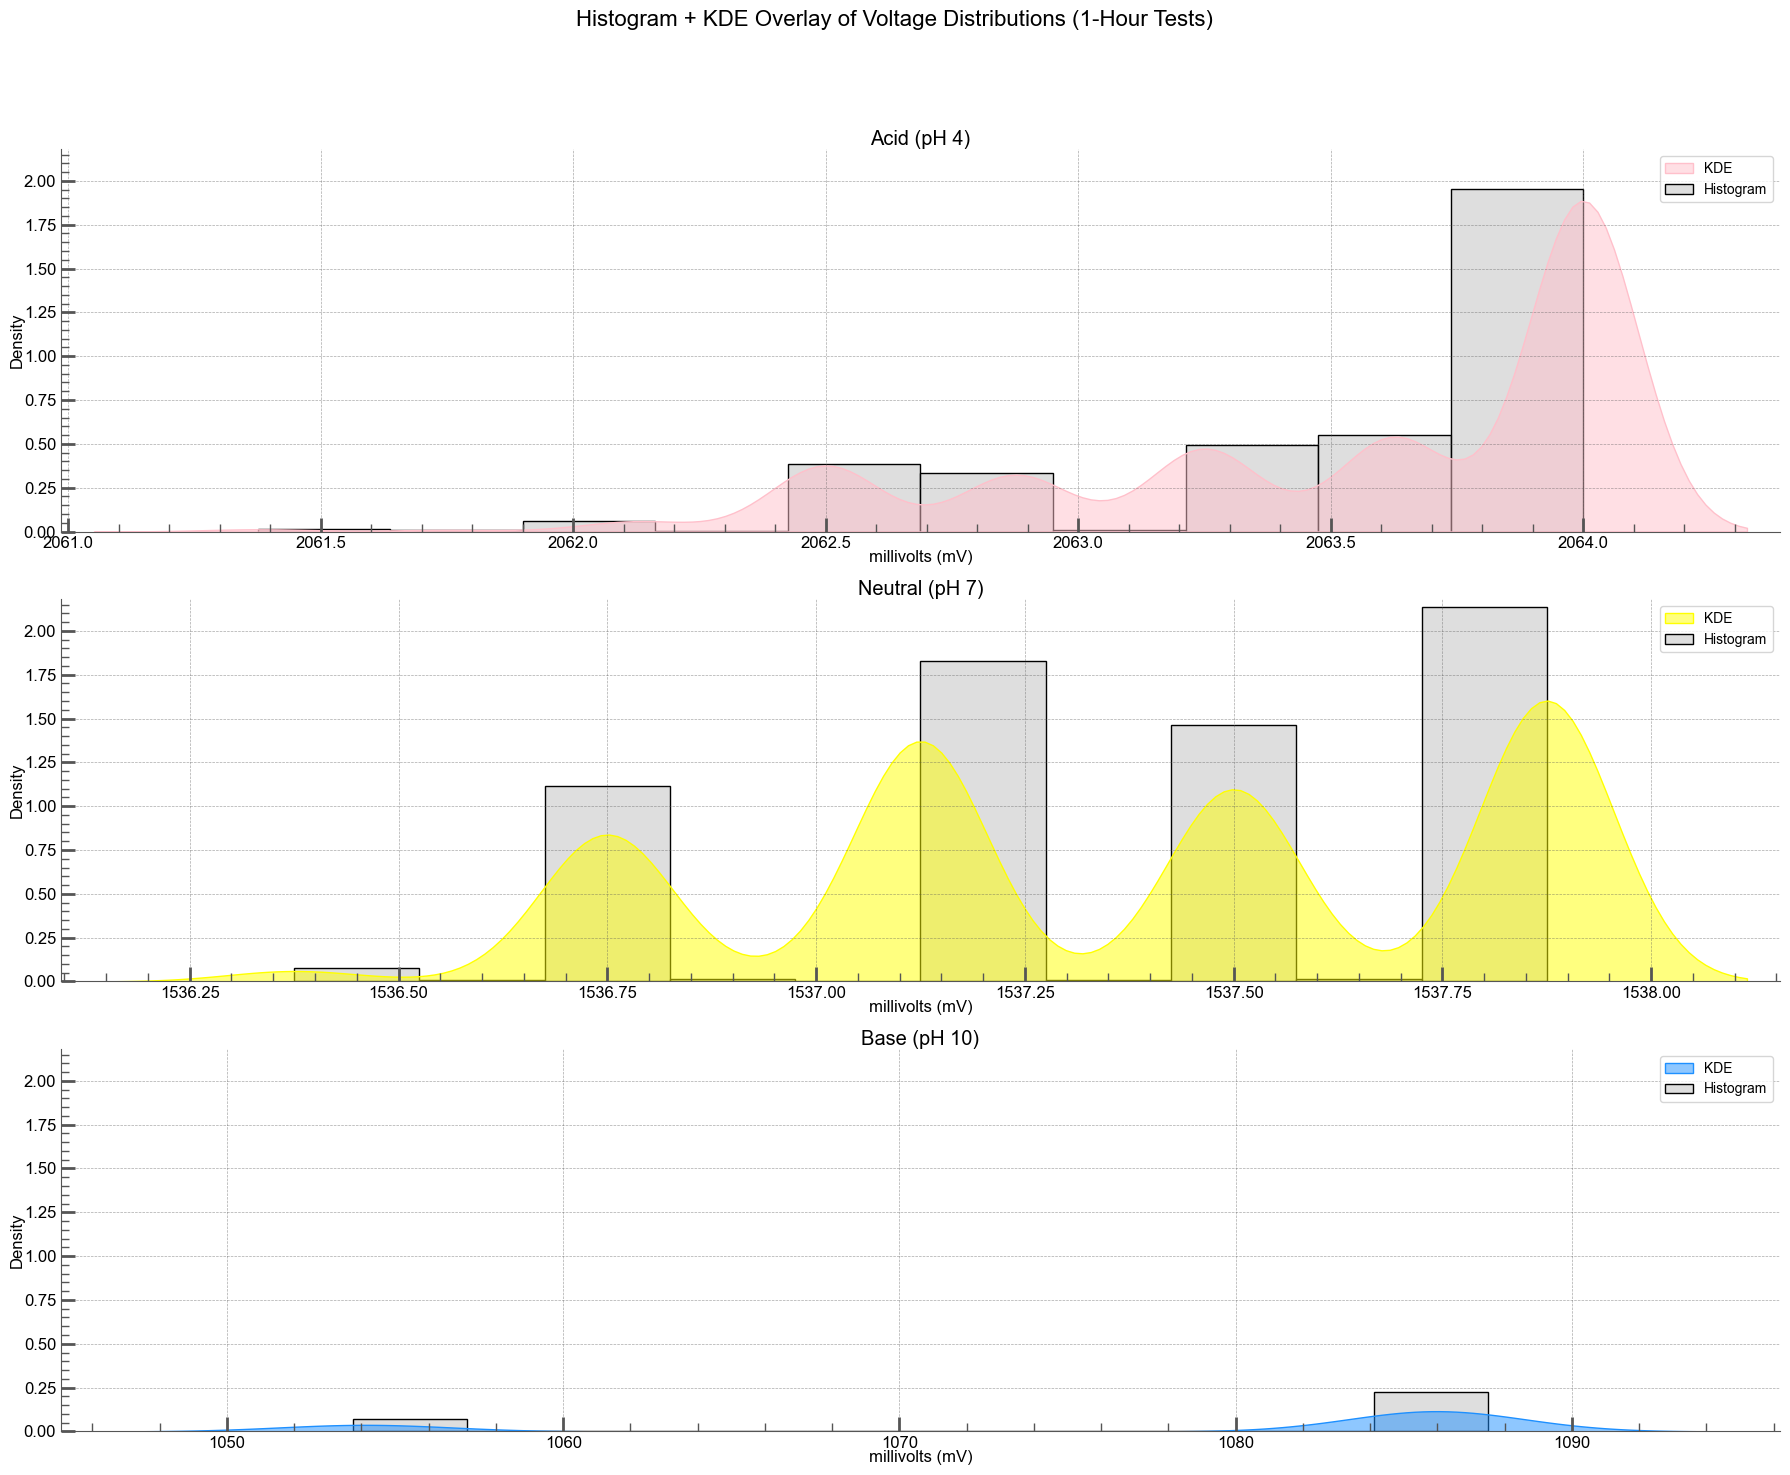

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from aquarel import load_theme

# Apply scientific plotting theme
theme = load_theme("scientific")
theme.apply()

# Set up test metadata
tests = [
    {
        "file": "acid/1-hour-test/cleaned for numpy/COM4_2025_04_16.12.17.51.713.csv",
        "label": "Acid (pH 4)",
        "color": "pink"
    },
    {
        "file": "neutral/1-hour-test/cleaned for numpy/COM4_2025_04_17.12.53.20.197.csv",
        "label": "Neutral (pH 7)",
        "color": "yellow"
    },
    {
        "file": "base/1-hour-test/cleaned for numpy/COM4_2025_04_17.10.34.01.939.csv",
        "label": "Base (pH 10)",
        "color": "dodgerblue"
    }
]

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(18, 14), sharey=True)

for ax, test in zip(axes, tests):
    df = pd.read_csv(test["file"], sep=';')
    data = df['Median'].to_numpy()

    # Print stats for reference
    mean = np.mean(data)
    var = np.var(data)
    print(f"{test['label']} variance: {var:.6f}")
    print(df.describe())

    # Histogram (normalized to density)
    sns.histplot(data, bins=10, stat="density", color="lightgray", edgecolor="black", label="Histogram", ax=ax)

    # KDE overlay
    sns.kdeplot(data, label="KDE", color=test["color"], fill=True, alpha=0.5, ax=ax)

    ax.set_title(test["label"])
    ax.set_xlabel("millivolts (mV)")
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.legend()

axes[0].set_ylabel("Density")

# Overall title
plt.suptitle("Histogram + KDE Overlay of Voltage Distributions (1-Hour Tests)", fontsize=16, y=1.05)

plt.tight_layout()
save_fig("pH_sensor_histogram_kde_comparison", tight_layout=True, fig_extension="png", resolution=600)
plt.show()

theme.apply_transforms()


## DFRobot Calibration Plot vs. Values

10-MINUTE TEST
10-minute test acid mean:  2062.575
10-minute test acid std:  1.7168284713389397
10-minute test acid var:  2.9475000000000007
10-minute test base mean:  1062.46875
10-minute test base std:  19.245256111896772
10-minute test base var:  370.3798828125
10-minute test neutral mean:  1536.525
10-minute test neutral std:  0.7721722605740251
10-minute test neutral var:  0.5962500000000001


<Figure size 640x480 with 0 Axes>

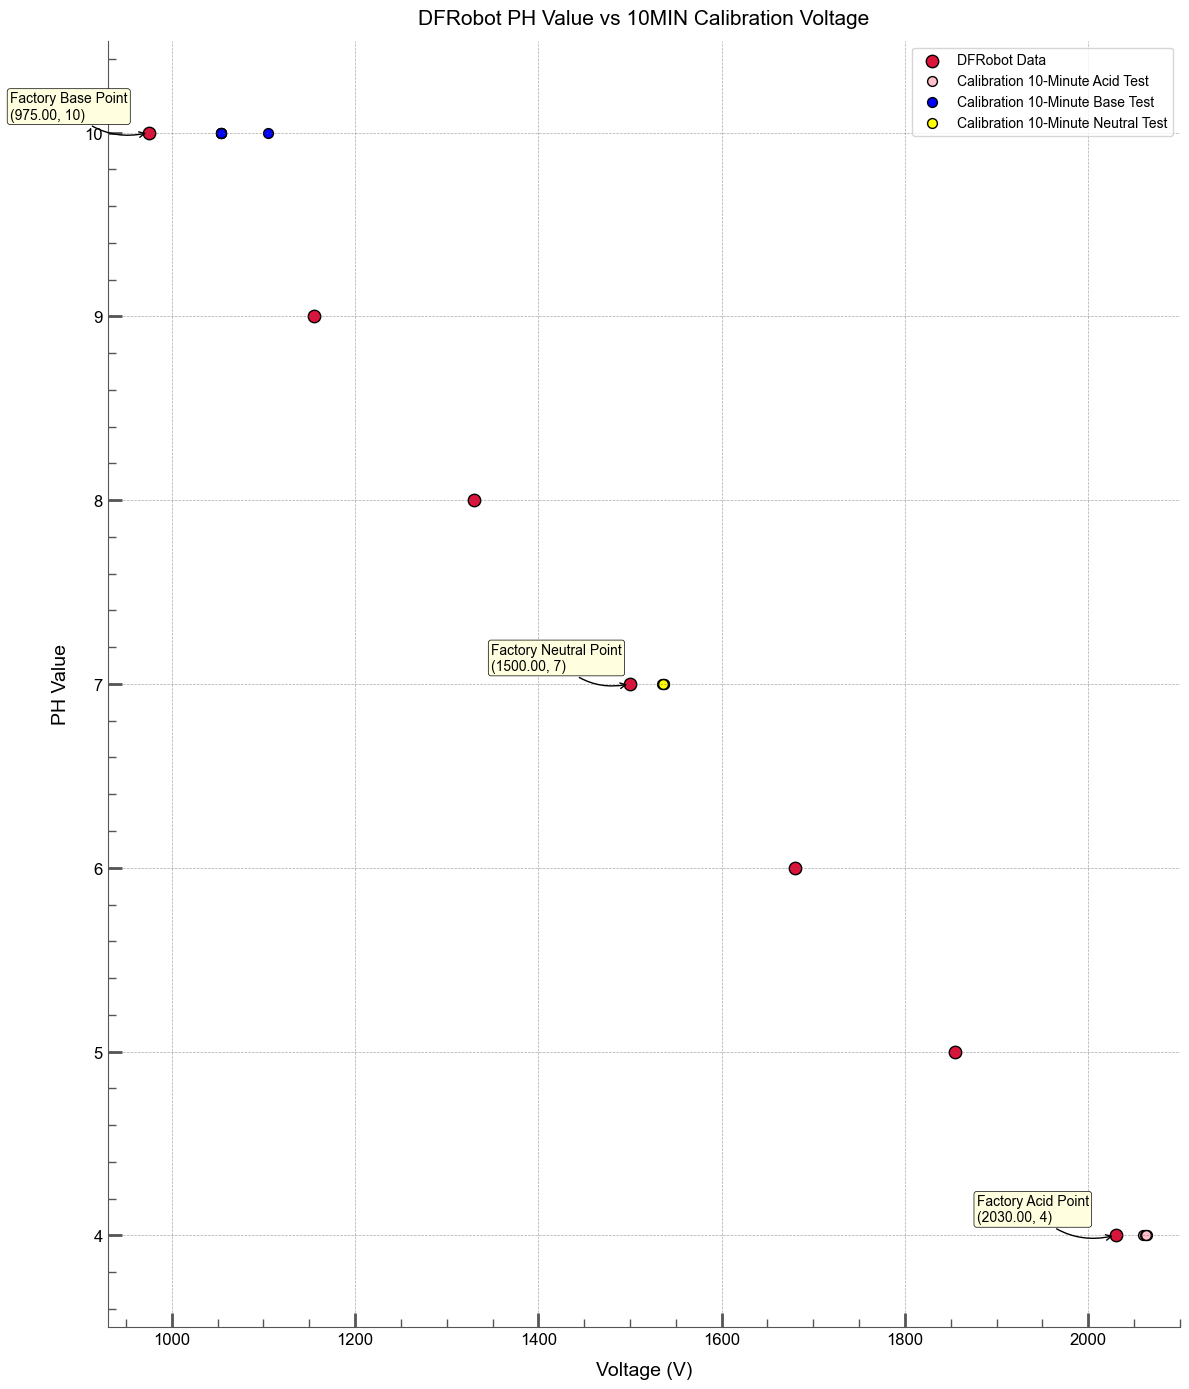

In [15]:
import numpy as np
import matplotlib.pyplot as plt

print("10-MINUTE TEST")

# Set the acid test values (10-minute test)
_10MINUTE_acid_test = np.array([2059.5, 2062.875, 2064.75, 2062.50, 2063.2500])
_10MINUTE_acid_test_mean = np.mean(_10MINUTE_acid_test)
_10MINUTE_acid_test_std = np.std(_10MINUTE_acid_test)
_10MINUTE_acid_test_var = np.var(_10MINUTE_acid_test)
print("10-minute test acid mean: ", _10MINUTE_acid_test_mean)
print("10-minute test acid std: ", _10MINUTE_acid_test_std)
print("10-minute test acid var: ", _10MINUTE_acid_test_var)

# Set the basic test values (10-minute test)
_10MINUTE_base_test = np.array([1105.500, 1054.1250, 1053.5625, 1053.7500, 1053.7500, 1054.1250])
_10MINUTE_base_test_mean = np.mean(_10MINUTE_base_test)
_10MINUTE_base_test_std = np.std(_10MINUTE_base_test)
_10MINUTE_base_test_var = np.var(_10MINUTE_base_test)
print("10-minute test base mean: ", _10MINUTE_base_test_mean)
print("10-minute test base std: ", _10MINUTE_base_test_std)
print("10-minute test base var: ", _10MINUTE_base_test_var)

# Set the neutral test values (10-minute test)
_10MINUTE_neutral_test = np.array([1535.2500, 1536.3750, 1537.1250, 1537.5000, 1536.3750])
_10MINUTE_neutral_test_mean = np.mean(_10MINUTE_neutral_test)
_10MINUTE_neutral_test_std = np.std(_10MINUTE_neutral_test)
_10MINUTE_neutral_test_var = np.var(_10MINUTE_neutral_test)
print("10-minute test neutral mean: ", _10MINUTE_neutral_test_mean)
print("10-minute test neutral std: ", _10MINUTE_neutral_test_std)
print("10-minute test neutral var: ", _10MINUTE_neutral_test_var)

# Set the plot Figure Size
plt.figure(figsize=(12,14))

from aquarel import load_theme
theme = load_theme("scientific")
theme.apply()

# Define numpy DFRobot voltage arrays
DFRobot_voltages = np.array([2745, 2570, 2390, 2210, 2030, 1855, 1680, 1500, 1330, 1155, 975, 800, 620, 445, 265])
DFRobot_ph = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
DFRobot = np.stack((DFRobot_voltages, DFRobot_ph), axis=1)
#print(DFRobot) # print the stacked array

# Set scatterplots
plt.scatter(DFRobot_voltages, DFRobot_ph, color='crimson', edgecolor='black', s=80, label='DFRobot Data') # DFRobot pH meter factory voltages
plt.scatter(_10MINUTE_acid_test, np.full(len(_10MINUTE_acid_test), 4), color='pink', edgecolor='black', s=50, label='Calibration 10-Minute Acid Test') # Acid
plt.scatter(_10MINUTE_base_test, np.full(len(_10MINUTE_base_test), 10), color='blue', edgecolor='black', s=50, label='Calibration 10-Minute Base Test') # Base
plt.scatter(_10MINUTE_neutral_test, np.full(len(_10MINUTE_neutral_test), 7), color='yellow', edgecolor='black', s=50, label='Calibration 10-Minute Neutral Test') # Neutral

# Annotations
important_points = [
    (1500, 7, "Factory Neutral Point"),
    (975, 10, "Factory Base Point"),
    (2030, 4, "Factory Acid Point"),
]

for x, y, label in important_points:
    plt.annotate(
        f'{label}\n({x:.2f}, {y})',
        xy=(x, y),
        xytext=(-100, 10),  # Offset
        textcoords='offset points',
        fontsize=10,
        color='black',
        bbox=dict(boxstyle="round,pad=0.2", fc="lightyellow", ec="black", lw=0.5),
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3")
    )

# Set labels
plt.xlabel('Voltage (V)', fontsize=14, labelpad=10)
plt.ylabel('PH Value', fontsize=14, labelpad=10)

# Title
plt.title('DFRobot PH Value vs 10MIN Calibration Voltage', fontsize=15, pad=12)

# Set limitations
plt.xlim(930, 2100)
plt.ylim(3.5, 10.5)

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Optional: tighter layout
plt.tight_layout()

# Save the figure
save_fig("pH_sensor_DFRobot_factory_value-vs-10MIN-calibration_voltage", tight_layout=True, fig_extension="png", resolution=300)

# Legend
plt.legend(loc='best')

# Show the plot
plt.show()

theme.apply_transforms()

1-HOUR TEST
1-hour test acid mean:  2063.5501807228916
1-hour test acid std:  0.5715476878685725
1-hour test acid var:  0.32666675950791113
1-hour test base mean:  1062.46875
1-hour test base std:  19.245256111896772
1-hour test base var:  370.3798828125
1-hour test neutral mean:  1537.376356427379
1-hour test neutral std:  0.4235669619766747
1-hour test neutral var:  0.1794089712781498


<Figure size 640x480 with 0 Axes>

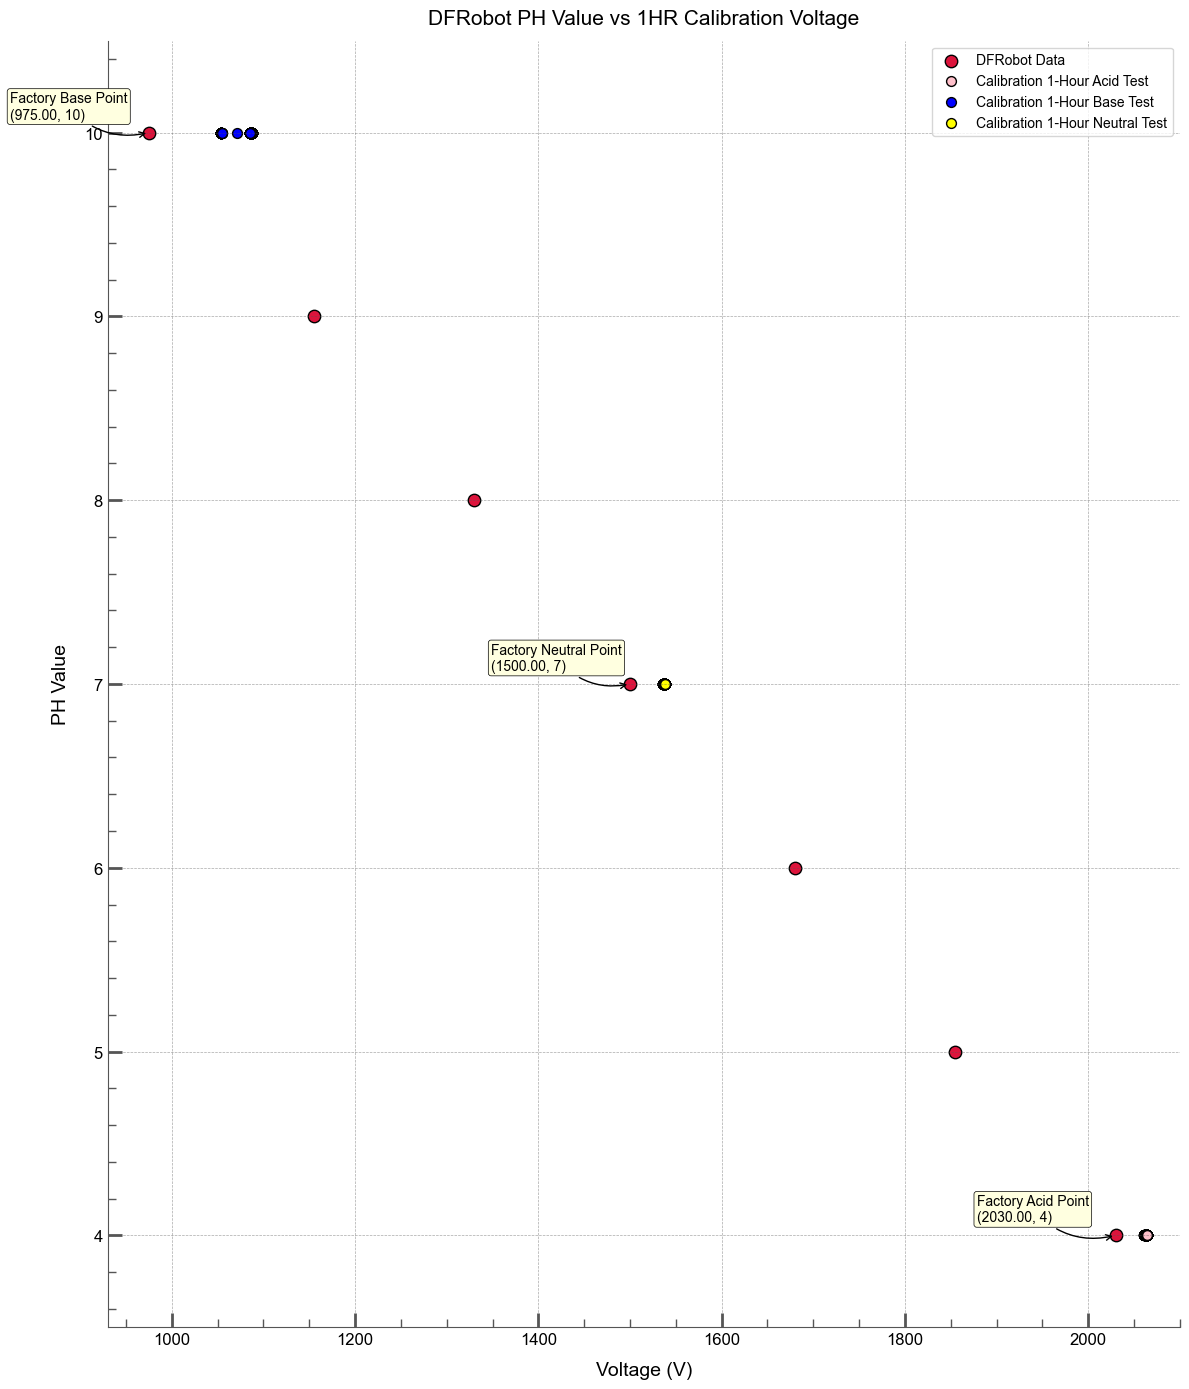

In [16]:
import numpy as np
import matplotlib.pyplot as plt

print("1-HOUR TEST")

# Set the acid test values (1-hour test)
df = pd.read_csv("acid/1-hour-test/cleaned for numpy/COM4_2025_04_16.12.17.51.713.csv", sep=';')
_1HOUR_acid_test = df['Median'].to_numpy()
_1HOUR_acid_test_mean = np.mean(_1HOUR_acid_test)
_1HOUR_acid_test_var = np.var(_1HOUR_acid_test)
_1HOUR_acid_test_std = np.std(_1HOUR_acid_test)
print("1-hour test acid mean: ", _1HOUR_acid_test_mean)
print("1-hour test acid std: ", _1HOUR_acid_test_std)
print("1-hour test acid var: ", _1HOUR_acid_test_var)

# Set the basic test values (10-minute test)
df = pd.read_csv("base/1-hour-test/cleaned for numpy/COM4_2025_04_17.10.34.01.939.csv", sep=';')
_1HOUR_base_test = df['Median'].to_numpy()
_1HOUR_base_test_var = np.var(_1HOUR_base_test)
_1HOUR_base_test_mean = np.mean(_1HOUR_base_test)
_1HOUR_base_test_std = np.std(_1HOUR_base_test)
print("1-hour test base mean: ", _10MINUTE_base_test_mean)
print("1-hour test base std: ", _10MINUTE_base_test_std)
print("1-hour test base var: ", _10MINUTE_base_test_var)

# Set the neutral test values (10-minute test)
df = pd.read_csv("neutral/1-hour-test/cleaned for numpy/COM4_2025_04_17.12.53.20.197.csv", sep=';')
_1HOUR_neutral_test = df['Median'].to_numpy()
_1HOUR_neutral_test_mean = np.mean(_1HOUR_neutral_test)
_1HOUR_neutral_test_var = np.var(_1HOUR_neutral_test)
_1HOUR_neutral_test_std = np.std(_1HOUR_neutral_test)
print("1-hour test neutral mean: ", _1HOUR_neutral_test_mean)
print("1-hour test neutral std: ", _1HOUR_neutral_test_std)
print("1-hour test neutral var: ", _1HOUR_neutral_test_var)

# Set the plot Figure Size
plt.figure(figsize=(12,14))

from aquarel import load_theme
theme = load_theme("scientific")
theme.apply()

# Define numpy DFRobot voltage arrays
DFRobot_voltages = np.array([2745, 2570, 2390, 2210, 2030, 1855, 1680, 1500, 1330, 1155, 975, 800, 620, 445, 265])
DFRobot_ph = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
DFRobot = np.stack((DFRobot_voltages, DFRobot_ph), axis=1)
#print(DFRobot) # print the stacked array

# Set scatterplots
plt.scatter(DFRobot_voltages, DFRobot_ph, color='crimson', edgecolor='black', s=80, label='DFRobot Data') # DFRobot pH meter factory voltages
plt.scatter(_1HOUR_acid_test, np.full(len(_1HOUR_acid_test), 4), color='pink', edgecolor='black', s=50, label='Calibration 1-Hour Acid Test') # Acid
plt.scatter(_1HOUR_base_test, np.full(len(_1HOUR_base_test), 10), color='blue', edgecolor='black', s=50, label='Calibration 1-Hour Base Test') # Base
plt.scatter(_1HOUR_neutral_test, np.full(len(_1HOUR_neutral_test), 7), color='yellow', edgecolor='black', s=50, label='Calibration 1-Hour Neutral Test') # Neutral

# Annotations
important_points = [
    (1500, 7, "Factory Neutral Point"),
    (975, 10, "Factory Base Point"),
    (2030, 4, "Factory Acid Point"),
]

for x, y, label in important_points:
    plt.annotate(
        f'{label}\n({x:.2f}, {y})',
        xy=(x, y),
        xytext=(-100, 10),  # Offset
        textcoords='offset points',
        fontsize=10,
        color='black',
        bbox=dict(boxstyle="round,pad=0.2", fc="lightyellow", ec="black", lw=0.5),
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3")
    )

# Set labels
plt.xlabel('Voltage (V)', fontsize=14, labelpad=10)
plt.ylabel('PH Value', fontsize=14, labelpad=10)

# Title
plt.title('DFRobot PH Value vs 1HR Calibration Voltage', fontsize=15, pad=12)

# Set limitations
plt.xlim(930, 2100)
plt.ylim(3.5, 10.5)

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Optional: tighter layout
plt.tight_layout()

# Save the figure
save_fig("pH_sensor_DFRobot_factory_value-vs-1HR-calibration_voltage", tight_layout=True, fig_extension="png", resolution=300)

# Legend
plt.legend(loc='best')

# Show the plot
plt.show()

theme.apply_transforms()

<Figure size 640x480 with 0 Axes>

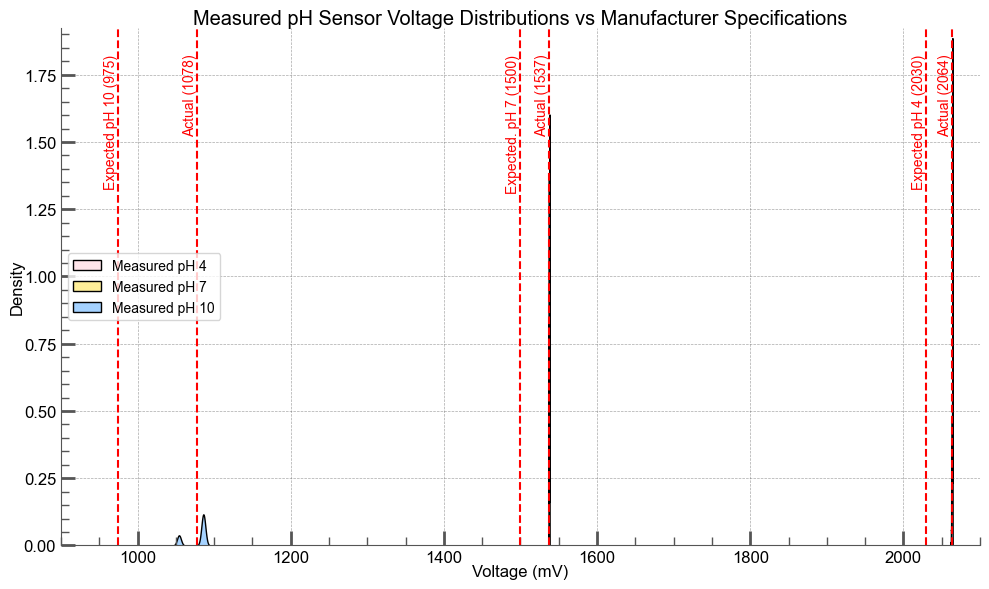

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from aquarel import load_theme

theme = load_theme("scientific")
theme.apply()

# Load your cleaned CSV files
df_acid = pd.read_csv("acid/1-hour-test/cleaned for numpy/COM4_2025_04_16.12.17.51.713.csv", sep=';')
df_neutral = pd.read_csv("neutral/1-hour-test/cleaned for numpy/COM4_2025_04_17.12.53.20.197.csv", sep=';')
df_base = pd.read_csv("base/1-hour-test/cleaned for numpy/COM4_2025_04_17.10.34.01.939.csv", sep=';')

# Extract median columns
acid_data = df_acid['Median'].to_numpy()
neutral_data = df_neutral['Median'].to_numpy()
base_data = df_base['Median'].to_numpy()

# Create the plot
plt.figure(figsize=(10, 6))

# Plot KDEs
sns.kdeplot(acid_data, label="Measured pH 4", color="pink", edgecolor="black",fill=True, alpha=0.4)
sns.kdeplot(neutral_data, label="Measured pH 7", color="gold", edgecolor="black", fill=True, alpha=0.4)
sns.kdeplot(base_data, label="Measured pH 10", color="dodgerblue", edgecolor="black", fill=True, alpha=0.4)

# Manufacturer reference voltages (vertical lines)
reference_voltages = {
    "Expected pH 4 (2030)": 2030,
    "Expected. pH 7 (1500)": 1500,
    "Expected pH 10 (975)": 975,
    "Actual (2064)": np.mean(acid_data),
    "Actual (1537)": np.mean(neutral_data),
    "Actual (1078)": np.mean(base_data)
}

for label, x in reference_voltages.items():
    plt.axvline(x=x, color="red", linestyle="--", linewidth=1.5)
    plt.text(x, plt.ylim()[1]*0.95, label, rotation=90, color="red", ha='right', va='top', fontsize=10)

# Formatting
plt.xlim(900, 2100)
plt.xlabel("Voltage (mV)")
plt.ylabel("Density")
plt.title("Measured pH Sensor Voltage Distributions vs Manufacturer Specifications")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
save_fig("ph_voltage_distribution_vs_dfr_specs", tight_layout=True, fig_extension="png", resolution=300)
plt.show()

theme.apply_transforms()


## Results:

- Here are the results of the 10-minute (tests spaced roughly 10 minutes apart) and 1-hour (an hour long) tests side-by-side.

| 10-minute  | 1-Hour| Solution|
|------------|-------|---------|
| 2062.575   | 2063.55 | Acid  |
| 1062.468   | 1078.23 | Base  |
| 1536.525   | 1537.38 | Neutral  |

- In my opinion, looking at the state-in time measurements and their deviation, there may be issues with the probe. To establish that, further tests would need to be performed.


## Begin Caculation

In [18]:
#Define resistor offset (10k resistor between ADS1115 A0 pin and ground)
resistancemultiplier = 2

# Set voltages for pH 4.00, 7.00, and 10.01 buffers, as measured by the sensor

neutralVoltage = _1HOUR_neutral_test_mean
acidVoltage = _1HOUR_acid_test_mean
baseVoltage = _1HOUR_base_test_mean

print("Let's confirm the values...")
print(f'Neutral voltage: {neutralVoltage}')
print(f'Acid voltage: {acidVoltage}')
print(f'Base voltage: {baseVoltage}')

# degrees Celsius, for temperature compensation, specify the temperature at which
# the sensor is calibrated, or to calculate the pH at a different temperature
temperature = 25.0 

slope = ((7 - 4.00)/(neutralVoltage - acidVoltage)+(7-10)/(neutralVoltage - baseVoltage))/2

print(f'Slope: {slope}')

intercept_t1 = 4.00 - (slope * acidVoltage)

print(f'Theoretical Intercept using Acid Voltage (not used in prod. code): {intercept_t1}')

intercept_t2 = 10.00 - (slope * baseVoltage)

print(f'Theoretical Intercept using Base Voltage (not used in prod. code): {intercept_t2}')

intercept = 7 - (slope * neutralVoltage)

print(f'Actual Intercept using Neutral Voltage (used in prod. code): {intercept}')

compensatedslope = slope*((temperature+273.15)/(25+273.15))

print(f'Compensated slope: {compensatedslope}')

# The volts are in millivolts
def calculatepH(voltage):
    # Calculate pH value
    # Voltage must first be compensated with resistor offset
    phvalue = compensatedslope * voltage + intercept
    print("pH with voltage: ", voltage, " is: ", phvalue)
    return phvalue

Let's confirm the values...
Neutral voltage: 1537.376356427379
Acid voltage: 2063.5501807228916
Base voltage: 1078.2311577652847
Slope: -0.006117709351083251
Theoretical Intercept using Acid Voltage (not used in prod. code): 16.624200237037968
Theoretical Intercept using Base Voltage (not used in prod. code): 16.596304836490003
Actual Intercept using Neutral Voltage (used in prod. code): 16.405221711850075
Compensated slope: -0.006117709351083251


[[2745    0]
 [2570    1]
 [2390    2]
 [2210    3]
 [2030    4]
 [1855    5]
 [1680    6]
 [1500    7]
 [1330    8]
 [1155    9]
 [ 975   10]
 [ 800   11]
 [ 620   12]
 [ 445   13]
 [ 265   14]]


<Figure size 640x480 with 0 Axes>

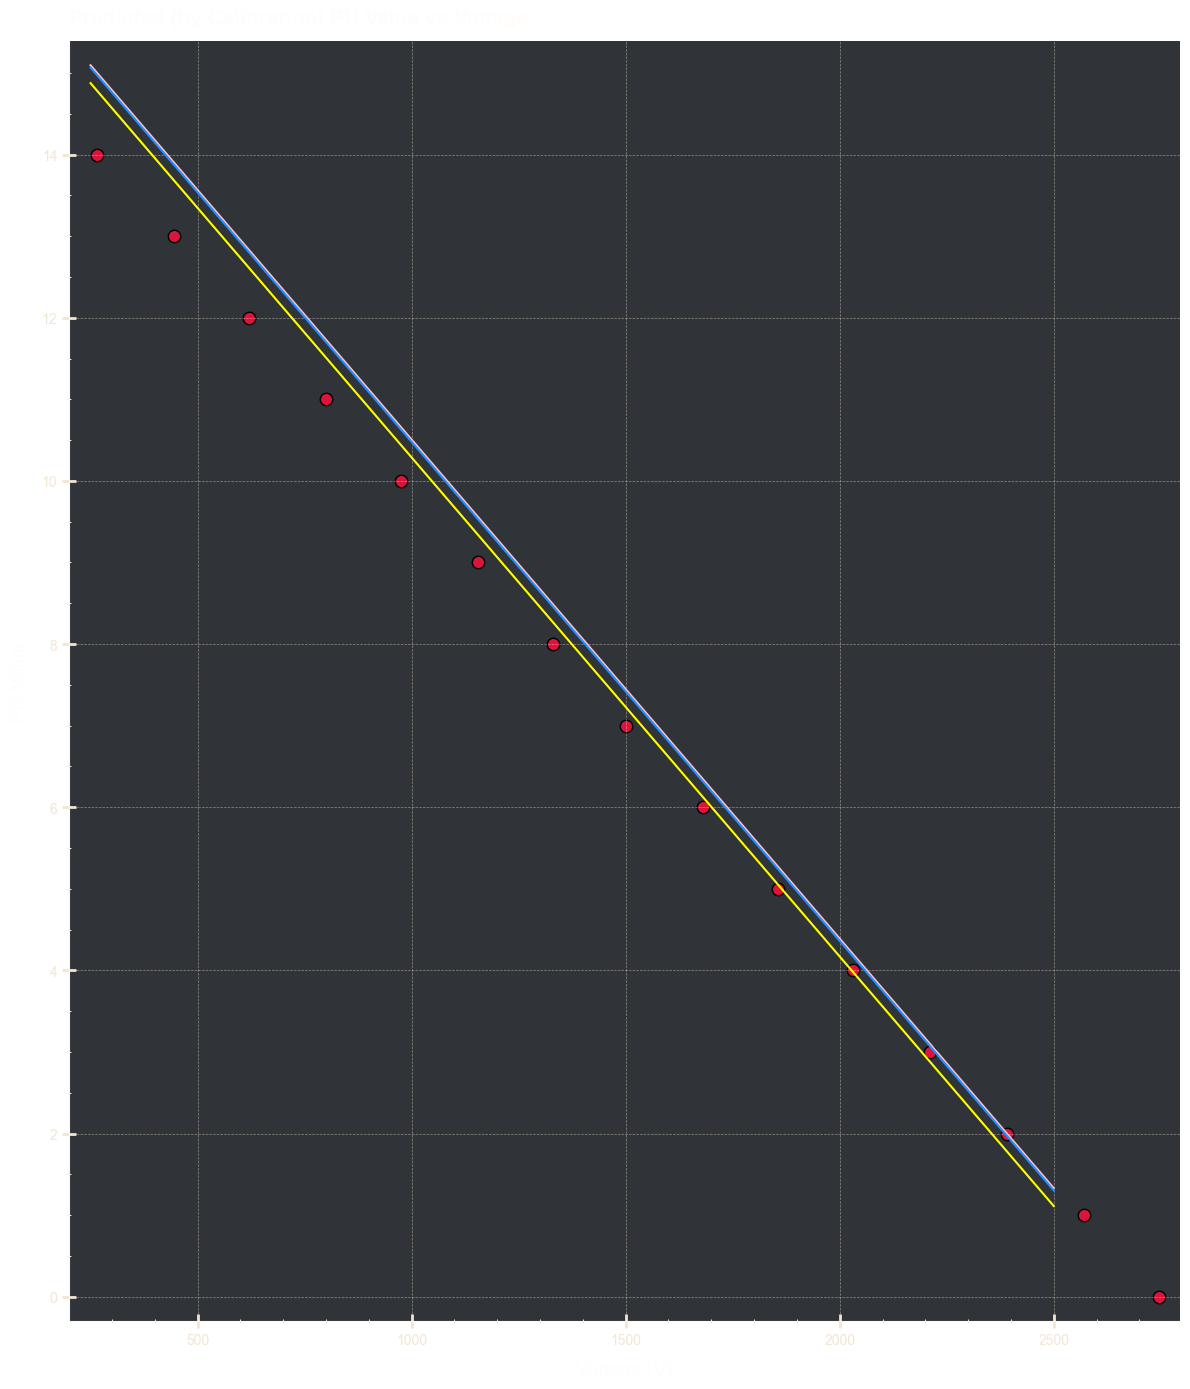

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return slope * x + intercept

def g(x):
    return slope * x + intercept_t1

def h(x):
    return slope * x + intercept_t2

plt.figure(figsize=(12,14))
x = np.linspace(250, 2500, 100)
y = f(x)
y1 = g(x)
y2 = h(x)

from aquarel import load_theme
theme = load_theme("umbra_dark")
theme.apply()

DFRobot_voltages = np.array([2745, 2570, 2390, 2210, 2030, 1855, 1680, 1500, 1330, 1155, 975, 800, 620, 445, 265])
DFRobot_ph = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
DFRobot = np.stack((DFRobot_voltages, DFRobot_ph), axis=1)
print(DFRobot)


plt.plot(x, y, label='pH 7.00', color = 'yellow')
plt.plot(x, y1, label='pH 4.00', color = 'pink')
plt.plot(x, y2, label='pH 10.00', color = 'dodgerblue')
plt.scatter(DFRobot_voltages, DFRobot_ph, color='crimson', edgecolor='black', s=80, label='DFRobot Data') # DFRobot pH meter factory voltages
plt.xlabel('Voltage (V)', fontsize=14, labelpad=10)
plt.ylabel('PH Value', fontsize=14, labelpad=10)
plt.title('Predicted (by Calibration) PH Value vs Voltage', fontsize=15, pad=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

theme.apply_transforms()

(57, 11)
These metrics apply to the neutral test measurements:
Slope (converted to volts!):  -6.117709351083251
Neutral Intercept:  16.405221711850075
PH Coefficient of Determination R²: 0.5120267369558706
PH RMSE: 0.08598945351844117
PH Standard Deviation: 0.12309691684812547
------------------------------------------------------
These metrics apply to the acid test measurements:
Acid Intercept:  16.624200237037968
PH Coefficient of Determination R²: -0.2750085264389035
PH RMSE: 0.1389964537144329
PH Standard Deviation: 0.12309691684812547
------------------------------------------------------
These metrics apply to the base test measurements:
Base Intercept:  16.596304836490003
PH Coefficient of Determination R²: 0.17702235873727068
PH RMSE: 0.11167120274699861
PH Standard Deviation: 0.12309691684812547


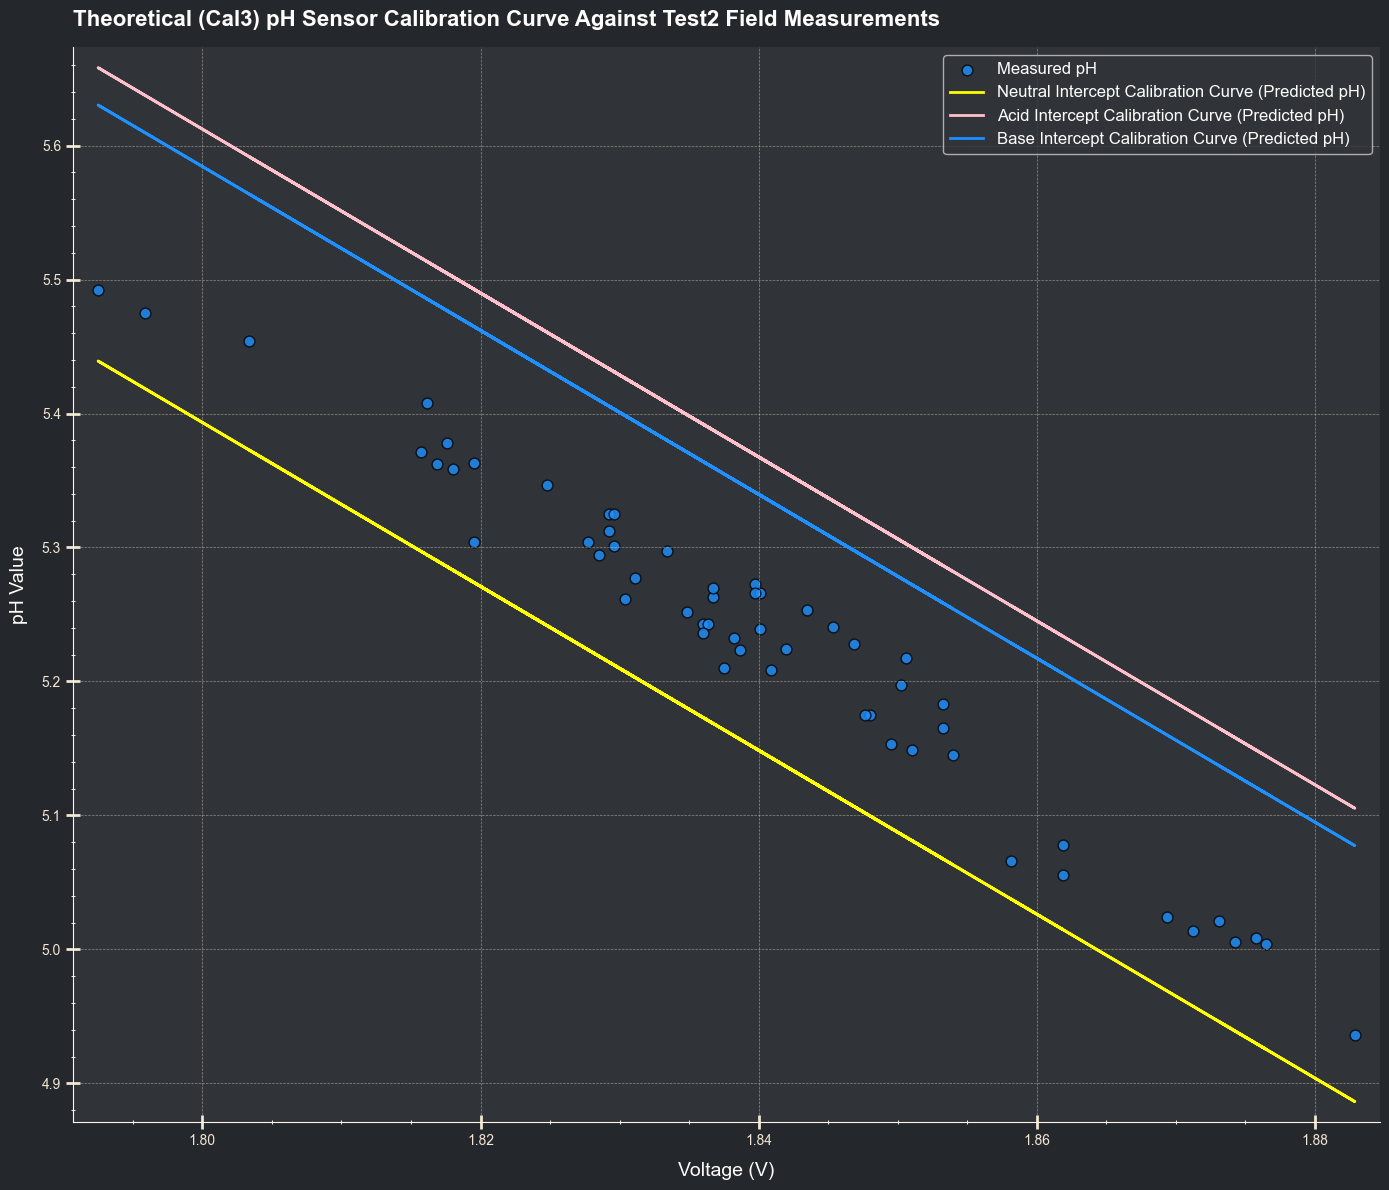

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from aquarel import load_theme

# Load dataset
df = pd.read_csv('data.csv', sep=';')
print(df.shape)

# Computed pH values from the sensor
y_computed = df['pH'].to_numpy()  # measured and fitted values

# Raw (unfitted), voltage multiplied values from the sensor
voltagePh = df['voltagePh'].to_numpy()  # measured and unfitted values

# Convert slope to Volts
slope = slope * 1000

# Predicted pH values using the equation -> neutral value
y_predicted = slope * voltagePh + intercept

# Predicted pH values using the equation -> acid value
y_predicted_acid = slope * voltagePh + intercept_t1

# Predicted pH values using the equation -> base value
y_predicted_base = slope * voltagePh + intercept_t2


# Print Slope and Intercept
print("These metrics apply to the neutral test measurements:")
print("Slope (converted to volts!): ", slope)
print("Neutral Intercept: ", intercept)

# Compute mean of actual values
y_mean = np.mean(y_computed)

# Compute R^2
ss_total = np.sum((y_computed - y_mean) ** 2)
ss_residual = np.sum((y_computed - y_predicted) ** 2)
r_squared = 1 - (ss_residual / ss_total)

# Compute RMSE
mse = ((y_computed - y_predicted) ** 2).mean()
rmse = np.sqrt(mse)

print("PH Coefficient of Determination R²:", r_squared)
print("PH RMSE:", rmse)
print("PH Standard Deviation:", np.std(y_computed))
print("------------------------------------------------------")
print("These metrics apply to the acid test measurements:")
print("Acid Intercept: ", intercept_t1)

# Compute R^2 acid
ss_total = np.sum((y_computed - y_mean) ** 2)
ss_residual = np.sum((y_computed - y_predicted_acid) ** 2)
r_squared = 1 - (ss_residual / ss_total)


# Compute RMSE Acid
mse = ((y_computed - y_predicted_acid) ** 2).mean()
rmse = np.sqrt(mse)

print("PH Coefficient of Determination R²:", r_squared)
print("PH RMSE:", rmse)
print("PH Standard Deviation:", np.std(y_computed))
print("------------------------------------------------------")
print("These metrics apply to the base test measurements:")
print("Base Intercept: ", intercept_t2)

# Compute R^2 base
ss_total = np.sum((y_computed - y_mean) ** 2)
ss_residual = np.sum((y_computed - y_predicted_base) ** 2)
r_squared = 1 - (ss_residual / ss_total)


# Compute RMSE Base
mse = ((y_computed - y_predicted_base) ** 2).mean()
rmse = np.sqrt(mse)

print("PH Coefficient of Determination R²:", r_squared)
print("PH RMSE:", rmse)
print("PH Standard Deviation:", np.std(y_computed))

# Plot the calibration curve

from aquarel import load_theme
theme = load_theme("umbra_dark")
theme.apply()

# Set the figure size
plt.figure(figsize=(14, 12))

# Actual data points
plt.scatter(voltagePh, y_computed, 
            label='Measured pH', 
            color='dodgerblue', 
            edgecolor='black', 
            s=60, 
            alpha=0.8)

# Prediction line
plt.plot(voltagePh, y_predicted, 
         color='yellow', 
         label='Neutral Intercept Calibration Curve (Predicted pH)', 
         linewidth=2)

# Prediction line for acid
plt.plot(voltagePh, y_predicted_acid,
         color='pink', 
         label='Acid Intercept Calibration Curve (Predicted pH)', 
         linewidth=2)

# Prediction line for base
plt.plot(voltagePh, y_predicted_base,
         color='dodgerblue', 
         label='Base Intercept Calibration Curve (Predicted pH)', 
         linewidth=2)

# Axis labels
plt.xlabel('Voltage (V)', fontsize=14, labelpad=10)
plt.ylabel('pH Value', fontsize=14, labelpad=10)

# Title
plt.title('Theoretical (Cal3) pH Sensor Calibration Curve Against Test2 Field Measurements', fontsize=16, pad=15)

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Legend
plt.legend(fontsize=12, loc='best', frameon=True)

# Optional: tighter layout
plt.tight_layout()

# Save the figure
save_fig("pH_sensor_calibration_curve_against_field_measurements", tight_layout=True, fig_extension="png", resolution=300)

# Show the plot
plt.show()

theme.apply_transforms()



(4269, 6)
These are the cleaned voltages:
[2061.375 2061.375 2061.375 ... 1537.875 1537.875 1537.875]
These are the cleaned pH values:
[3.7943286  3.7943286  3.7943286  ... 6.99694944 6.99694944 6.99694944]
voltagePh length: 12807
y_computed length: 12807
voltagePh_clean length: 12612
y_computed_clean length: 12612
------------------------------------------------------
These are the predicted pH values:
[3.7943286  3.7943286  3.7943286  ... 6.99694944 6.99694944 6.99694944]
These metrics apply to the neutral test measurements:
Slope (converted!):  -0.006117709351083251
Neutral Intercept:  16.405221711850075
PH Coefficient of Determination R²: 1.0
PH RMSE: 3.5682532314037913e-10
PH Standard Deviation: 2.4639114752734836
------------------------------------------------------
These metrics apply to the acid test measurements:
Acid Intercept:  16.624200237037968
PH Coefficient of Determination R²: 0.9921013503307822
PH RMSE: 0.21897852501848417
PH Standard Deviation: 2.4639114752734836
---

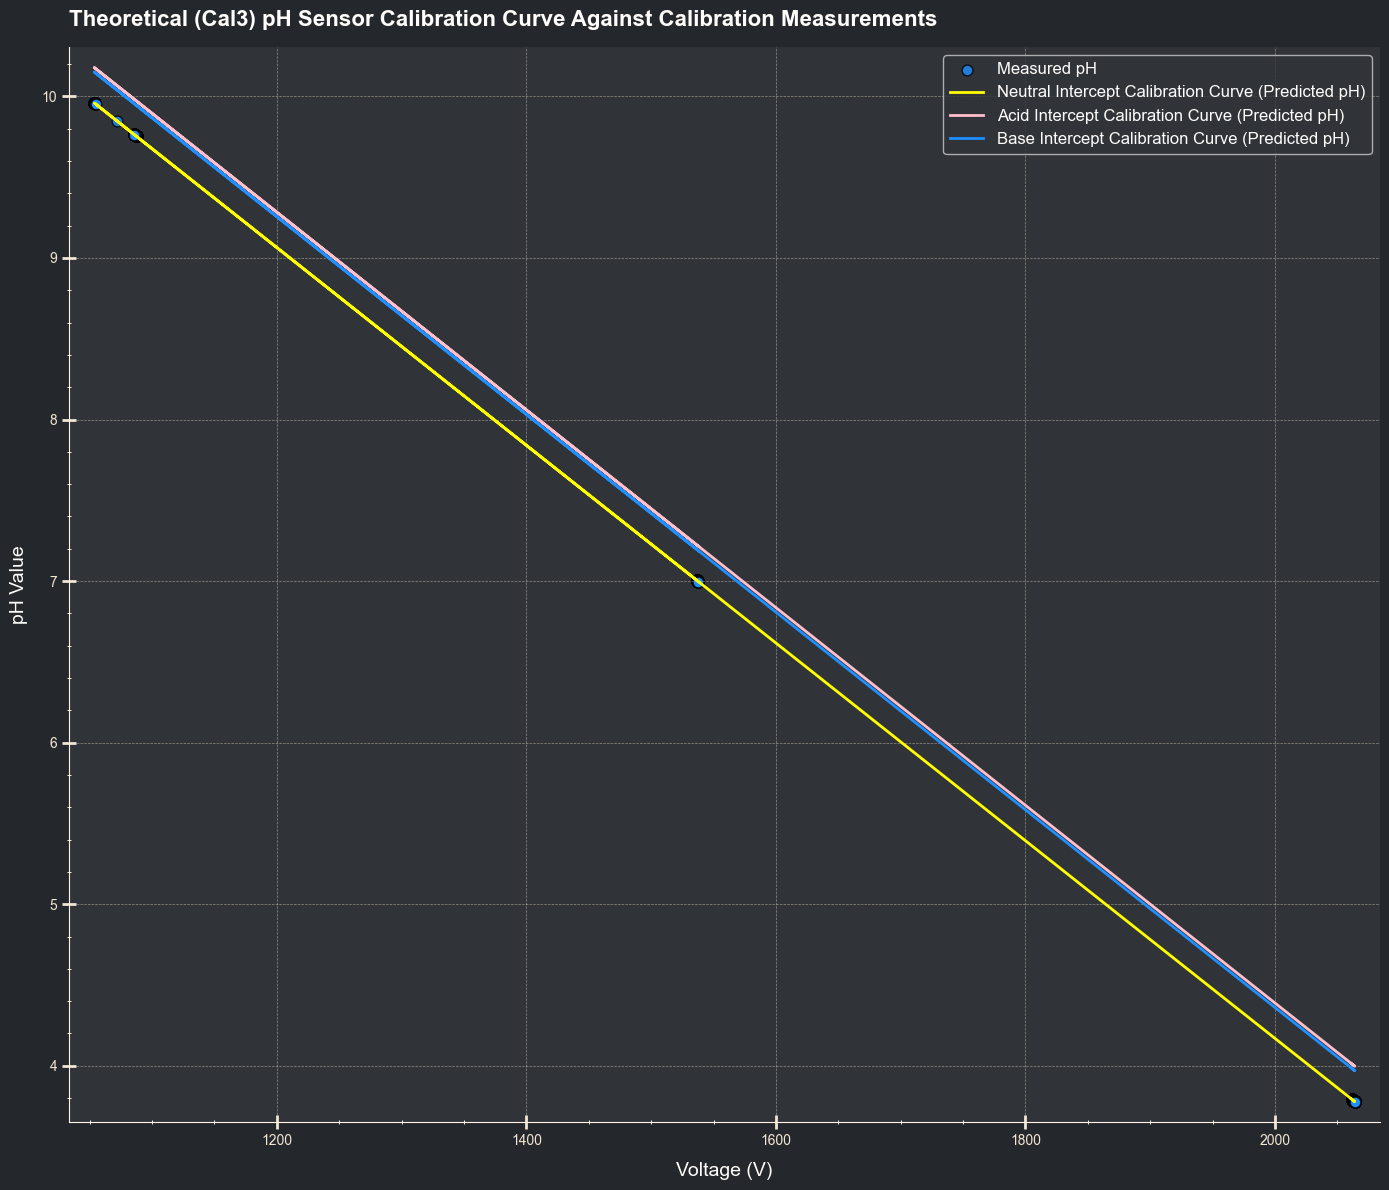

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from aquarel import load_theme

# Load dataset
df = pd.read_csv('data1_neutral-int.csv', sep=';')
print(df.shape)

# Computed pH values from the sensor
y_computed_acid = df['AcidPH'].to_numpy()
y_computed_base = df['BasePH'].to_numpy()
y_computed_nuetral = df['NeutralPH'].to_numpy()

y_computed = np.concatenate((y_computed_acid, y_computed_base, y_computed_nuetral))

# Raw voltage multiplied values from the sensor
voltagePh_acid = df['Acid'].to_numpy()
voltagePh_base = df['Base'].to_numpy()
voltagePh_neutral = df['Neutral'].to_numpy()

voltagePh = np.concatenate((voltagePh_acid, voltagePh_base, voltagePh_neutral))

# Stack voltage and pH values together, then drop any row with NaNs
stacked = np.column_stack((voltagePh, y_computed))
cleaned = stacked[~np.isnan(stacked).any(axis=1)]

voltagePh_clean = cleaned[:, 0]
print("These are the cleaned voltages:")
print(voltagePh_clean)

y_computed_clean = cleaned[:, 1]
print("These are the cleaned pH values:")
print(y_computed_clean)

# Verify array lengths
print("voltagePh length:", len(voltagePh))
print("y_computed length:", len(y_computed))
print("voltagePh_clean length:", len(voltagePh_clean))
print("y_computed_clean length:", len(y_computed_clean))
print("------------------------------------------------------")


# Convert slope to handle millivolts
slope = slope / 1000

# Predicted pH values using the equation -> neutral value
y_predicted = slope * voltagePh_clean + intercept

print("These are the predicted pH values:")
print(y_predicted)

# Predicted pH values using the equation -> acid value
y_predicted_acid = slope * voltagePh_clean + intercept_t1

# Predicted pH values using the equation -> base value
y_predicted_base = slope * voltagePh_clean + intercept_t2


# Print Slope and Intercept
print("These metrics apply to the neutral test measurements:")
print("Slope (converted!): ", slope)
print("Neutral Intercept: ", intercept)

# Compute mean of actual values
y_mean = np.mean(y_computed_clean)

# Compute R^2
ss_total = np.sum((y_computed_clean - y_mean) ** 2)
ss_residual = np.sum((y_computed_clean - y_predicted) ** 2)
r_squared = 1 - (ss_residual / ss_total)

# Compute RMSE
mse = ((y_computed_clean - y_predicted) ** 2).mean()
rmse = np.sqrt(mse)

print("PH Coefficient of Determination R²:", r_squared)
print("PH RMSE:", rmse)
print("PH Standard Deviation:", np.std(y_computed_clean))
print("------------------------------------------------------")
print("These metrics apply to the acid test measurements:")
print("Acid Intercept: ", intercept_t1)

# Compute R^2 acid
ss_total = np.sum((y_computed_clean - y_mean) ** 2)
ss_residual = np.sum((y_computed_clean - y_predicted_acid) ** 2)
r_squared = 1 - (ss_residual / ss_total)


# Compute RMSE Acid
mse = ((y_computed_clean - y_predicted_acid) ** 2).mean()
rmse = np.sqrt(mse)

print("PH Coefficient of Determination R²:", r_squared)
print("PH RMSE:", rmse)
print("PH Standard Deviation:", np.std(y_computed_clean))
print("------------------------------------------------------")
print("These metrics apply to the base test measurements:")
print("Base Intercept: ", intercept_t2)

# Compute R^2 base
ss_total = np.sum((y_computed_clean - y_mean) ** 2)
ss_residual = np.sum((y_computed_clean - y_predicted_base) ** 2)
r_squared = 1 - (ss_residual / ss_total)


# Compute RMSE Base
mse = ((y_computed_clean - y_predicted_base) ** 2).mean()
rmse = np.sqrt(mse)

print("PH Coefficient of Determination R²:", r_squared)
print("PH RMSE:", rmse)
print("PH Standard Deviation:", np.std(y_computed_clean))

# Plot the calibration curve

from aquarel import load_theme
theme = load_theme("umbra_dark")
theme.apply()

# Set the figure size
plt.figure(figsize=(14, 12))

# Actual data points
plt.scatter(voltagePh_clean, y_computed_clean, 
            label='Measured pH', 
            color='dodgerblue', 
            edgecolor='black', 
            s=60, 
            alpha=0.8)

# Prediction line
plt.plot(voltagePh_clean, y_predicted, 
         color='yellow', 
         label='Neutral Intercept Calibration Curve (Predicted pH)', 
         linewidth=2)

# Prediction line for acid
plt.plot(voltagePh_clean, y_predicted_acid,
         color='pink', 
         label='Acid Intercept Calibration Curve (Predicted pH)', 
         linewidth=2)

# Prediction line for base
plt.plot(voltagePh_clean, y_predicted_base,
         color='dodgerblue', 
         label='Base Intercept Calibration Curve (Predicted pH)', 
         linewidth=2)

# Axis labels
plt.xlabel('Voltage (V)', fontsize=14, labelpad=10)
plt.ylabel('pH Value', fontsize=14, labelpad=10)

# Title
plt.title('Theoretical (Cal3) pH Sensor Calibration Curve Against Calibration Measurements', fontsize=16, pad=15)

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Legend
plt.legend(fontsize=12, loc='best', frameon=True)

# Optional: tighter layout
plt.tight_layout()

# Save the figure
save_fig("pH_sensor_calibration_curve_against_calibration_measurements", tight_layout=True, fig_extension="png", resolution=300)

# Show the plot
plt.show()

theme.apply_transforms()

(12612, 2)
Coefficients:  -0.006117709351597612
Intercept:  16.405221712819642
These metrics apply to the test set:
Mean absolute error:  1.7958583367476864e-10
Mean squared error:  5.439398235600884e-20
Root mean squared error:  2.3322517521916206e-10
Coefficient of determination R²:  1.0


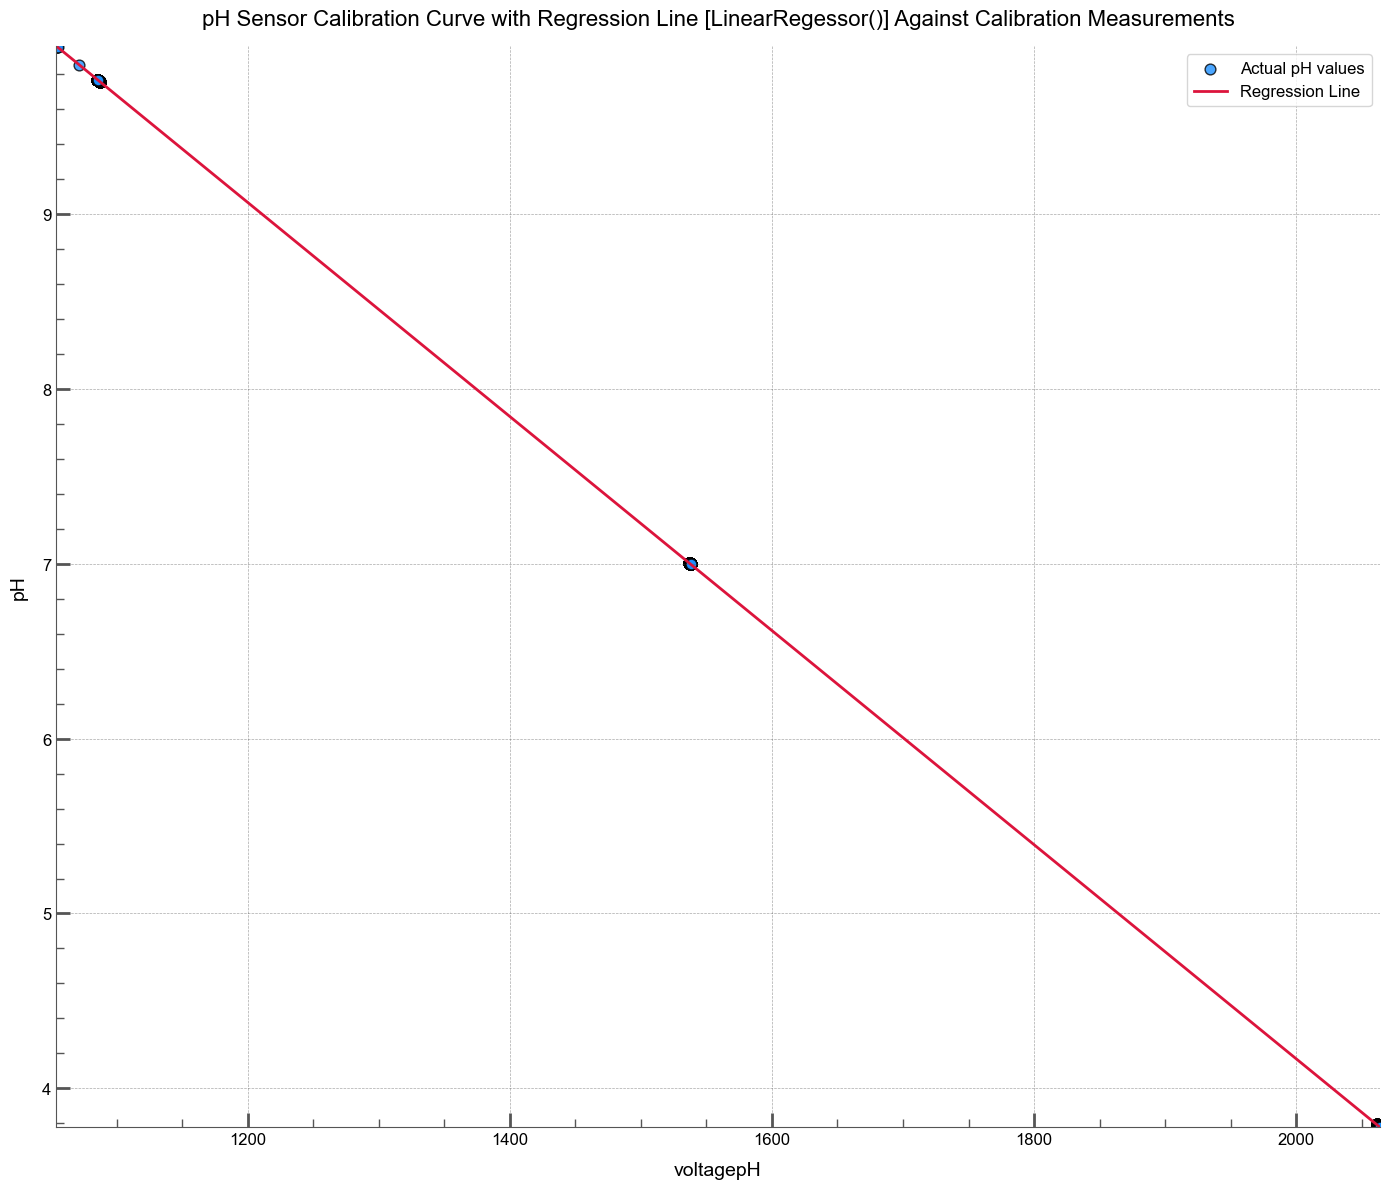

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

voltagePh = voltagePh_clean.reshape(-1, 1)
pH = y_computed_clean.reshape(-1, 1)
df = pd.DataFrame(data={'voltagePh': voltagePh.flatten(), 'pH': pH.flatten()})
print(df.shape)


X = df[['voltagePh']].values
y = df['pH'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

# Print the coefficients and intercept
print("Coefficients: ", linear_model.coef_[0])
print("Intercept: ", linear_model.intercept_)

# Print the performance metrics
print("These metrics apply to the test set:")
print("Mean absolute error: ", np.mean(np.abs(y_test - y_pred)))
print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of determination R²: ", r2_score(y_test, y_pred))

# Regression Line

from aquarel import load_theme
theme = load_theme("scientific")
theme.apply()

# Set the figure size
plt.figure(figsize=(14, 12))

# Create a scatter plot of the actual pH values
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range = linear_model.predict(x_range)
plt.scatter(X, y, label='Actual pH values', s=60, alpha=0.8, color='dodgerblue', edgecolor='black')

# Optional: Create a scatter plot of the test pH values
#plt.scatter(X_test, y_test, label='Test pH values', s=10, alpha=0.5)

# Plot the regression line
plt.plot(x_range, y_range, color='crimson', label='Regression Line', linewidth=2.0)

# Set the axis labels and title
plt.xlabel('voltagepH', fontsize=14, labelpad=10)
plt.ylabel('pH', fontsize=14, labelpad=10)

# Set x and y limits
plt.xlim(X.min(), X.max())
plt.ylim(y.min(), y.max())
plt.xticks(fontsize=12)

# Set legend properties
plt.legend(fontsize=12, loc='best', frameon=True)

# Set title and font size
plt.title('pH Sensor Calibration Curve with Regression Line [LinearRegessor()] Against Calibration Measurements', fontsize=16, pad=15)

# Set the grid and layout
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

theme.apply_transforms()


In [23]:
print("Test 2 differences in slopes and intercepts")
# Print the coefficients and intercepts of the two models
print("Slope of the Calibration Line: ", compensatedslope*1000)
print("Intercept of the Calibration Line: ", intercept)
print("Coefficient of the Model: ", linear_model.coef_[0])
print("Intercept of the Model: ", linear_model.intercept_)
print("Slope difference (calibration - model): ", compensatedslope*1000 - (linear_model.coef_[0]))
print("Intercept difference (calibration - model): ", intercept - linear_model.intercept_)

Test 2 differences in slopes and intercepts
Slope of the Calibration Line:  -6.117709351083251
Intercept of the Calibration Line:  16.405221711850075
Coefficient of the Model:  -0.006117709351597612
Intercept of the Model:  16.405221712819642
Slope difference (calibration - model):  -6.111591641731653
Intercept difference (calibration - model):  -9.69567537367766e-10


(4297, 10)
voltagePh length: 4297
y_computed length: 4297
------------------------------------------------------
These are the predicted pH values:
[5.73287775 5.73287775 5.73287775 ... 6.06093991 6.06093991 6.06093991]
These metrics apply to the neutral test measurements:
Slope (converted!):  -0.006117709351083251
Neutral Intercept:  16.405221711850075
PH Coefficient of Determination R²: 0.9964854302864012
PH RMSE: 0.054929324602054026
PH Standard Deviation: 2.4639114752734836
------------------------------------------------------


<Figure size 640x480 with 0 Axes>

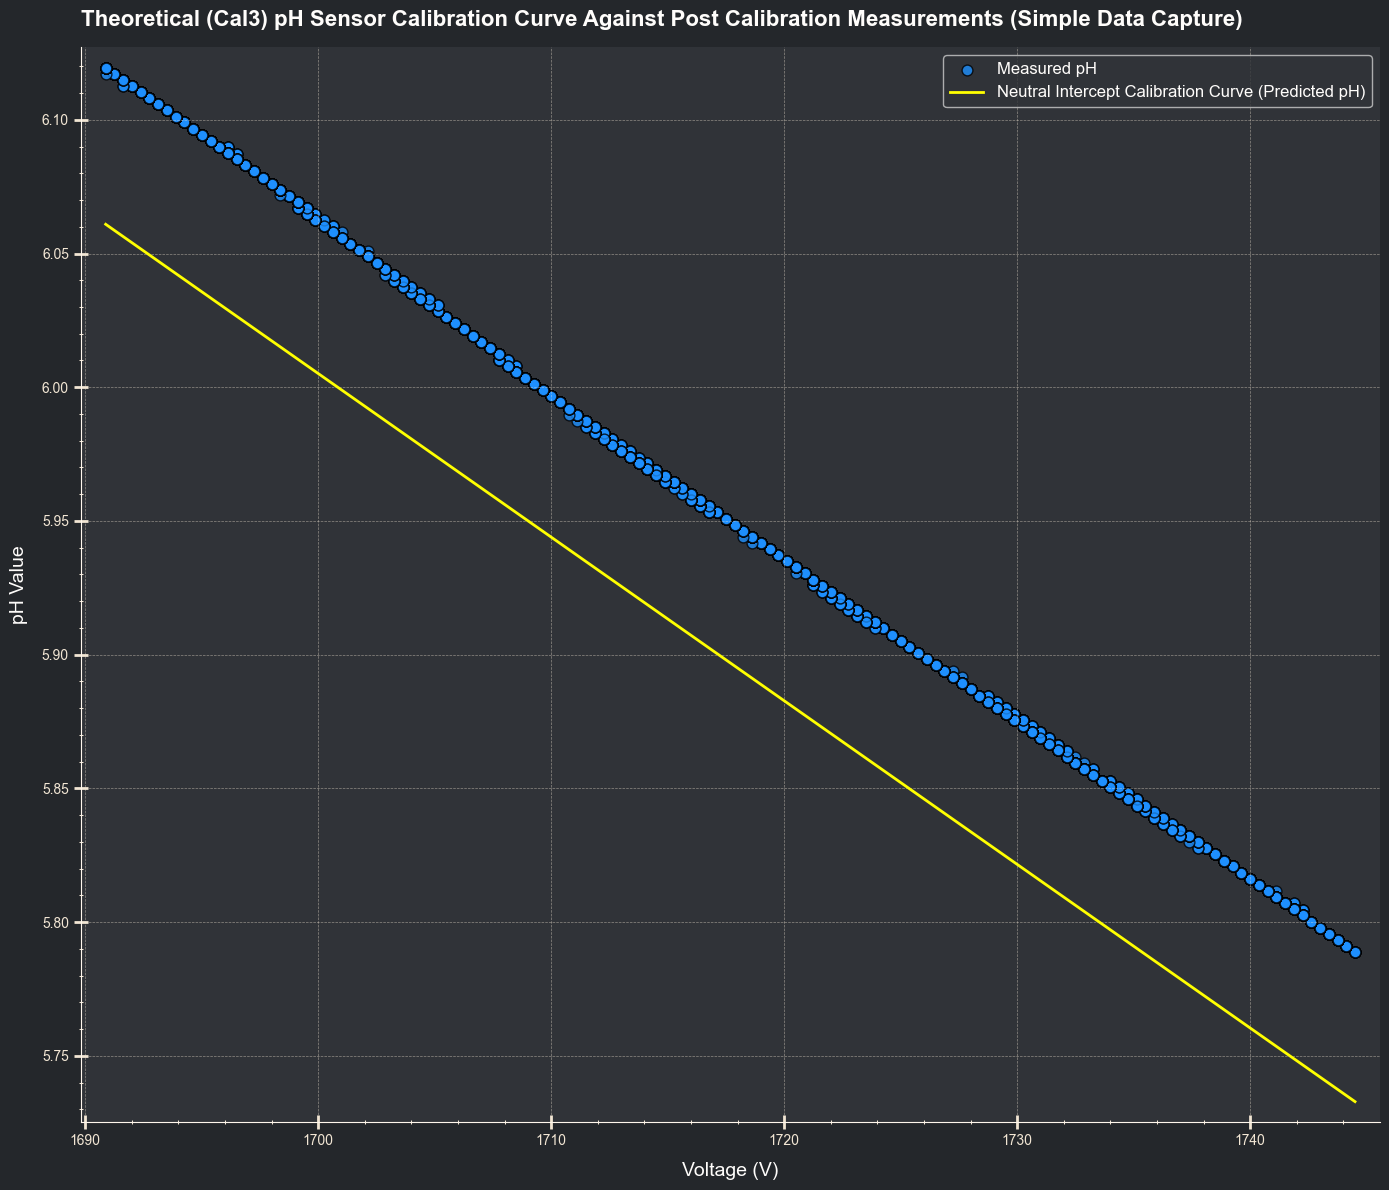

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from aquarel import load_theme

# Load dataset
df = pd.read_csv('calibrationData/cleaned for numpy/COM4_2025_04_24.13.44.27.569.csv', sep=';')
print(df.shape)

# Computed pH values from the sensor
y_computed = df['pH'].to_numpy()  # measured and fitted values

# Raw voltage multiplied values from the sensor
voltagePh = df['voltagePh'].to_numpy()

# Verify array lengths
print("voltagePh length:", len(voltagePh))
print("y_computed length:", len(y_computed))
print("------------------------------------------------------")


# Convert slope to handle millivolts
slope = -0.006117709351083251

# Intercept
intercept = 16.405221711850075

# Predicted pH values using the equation -> neutral value
y_predicted = slope * voltagePh + intercept

print("These are the predicted pH values:")
print(y_predicted)


# Print Slope and Intercept
print("These metrics apply to the neutral test measurements:")
print("Slope (converted!): ", slope)
print("Neutral Intercept: ", intercept)

# Compute mean of actual values
y_mean = np.mean(y_computed_clean)

# Compute R^2
ss_total = np.sum((y_computed - y_mean) ** 2)
ss_residual = np.sum((y_computed - y_predicted) ** 2)
r_squared = 1 - (ss_residual / ss_total)

# Compute RMSE
mse = ((y_computed - y_predicted) ** 2).mean()
rmse = np.sqrt(mse)

print("PH Coefficient of Determination R²:", r_squared)
print("PH RMSE:", rmse)
print("PH Standard Deviation:", np.std(y_computed_clean))
print("------------------------------------------------------")

# Plot the calibration curve

from aquarel import load_theme
theme = load_theme("umbra_dark")
theme.apply()

# Set the figure size
plt.figure(figsize=(14, 12))

# Actual data points
plt.scatter(voltagePh, y_computed, 
            label='Measured pH', 
            color='dodgerblue', 
            edgecolor='black', 
            s=60, 
            alpha=0.8)

# Prediction line
plt.plot(voltagePh, y_predicted, 
         color='yellow', 
         label='Neutral Intercept Calibration Curve (Predicted pH)', 
         linewidth=2)

# Axis labels
plt.xlabel('Voltage (V)', fontsize=14, labelpad=10)
plt.ylabel('pH Value', fontsize=14, labelpad=10)

# Title
plt.title('Theoretical (Cal3) pH Sensor Calibration Curve Against Post Calibration Measurements (Simple Data Capture)', fontsize=16, pad=15)

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Legend
plt.legend(fontsize=12, loc='best', frameon=True)

# Optional: tighter layout
plt.tight_layout()

# Save the figure
save_fig("pH_sensor_calibration_curve_against_post_calibration_measurements", tight_layout=True, fig_extension="png", resolution=300)

# Show the plot
plt.show()

theme.apply_transforms()

(4297, 10)
Coefficients:  -0.006210053443967956
Intercept:  16.61844551238495
These metrics apply to the test set:
Mean absolute error:  0.0019119797801332614
Mean squared error:  4.979517478117694e-06
Root mean squared error:  0.002231483246210398
Coefficient of determination R²:  0.9994435305592628


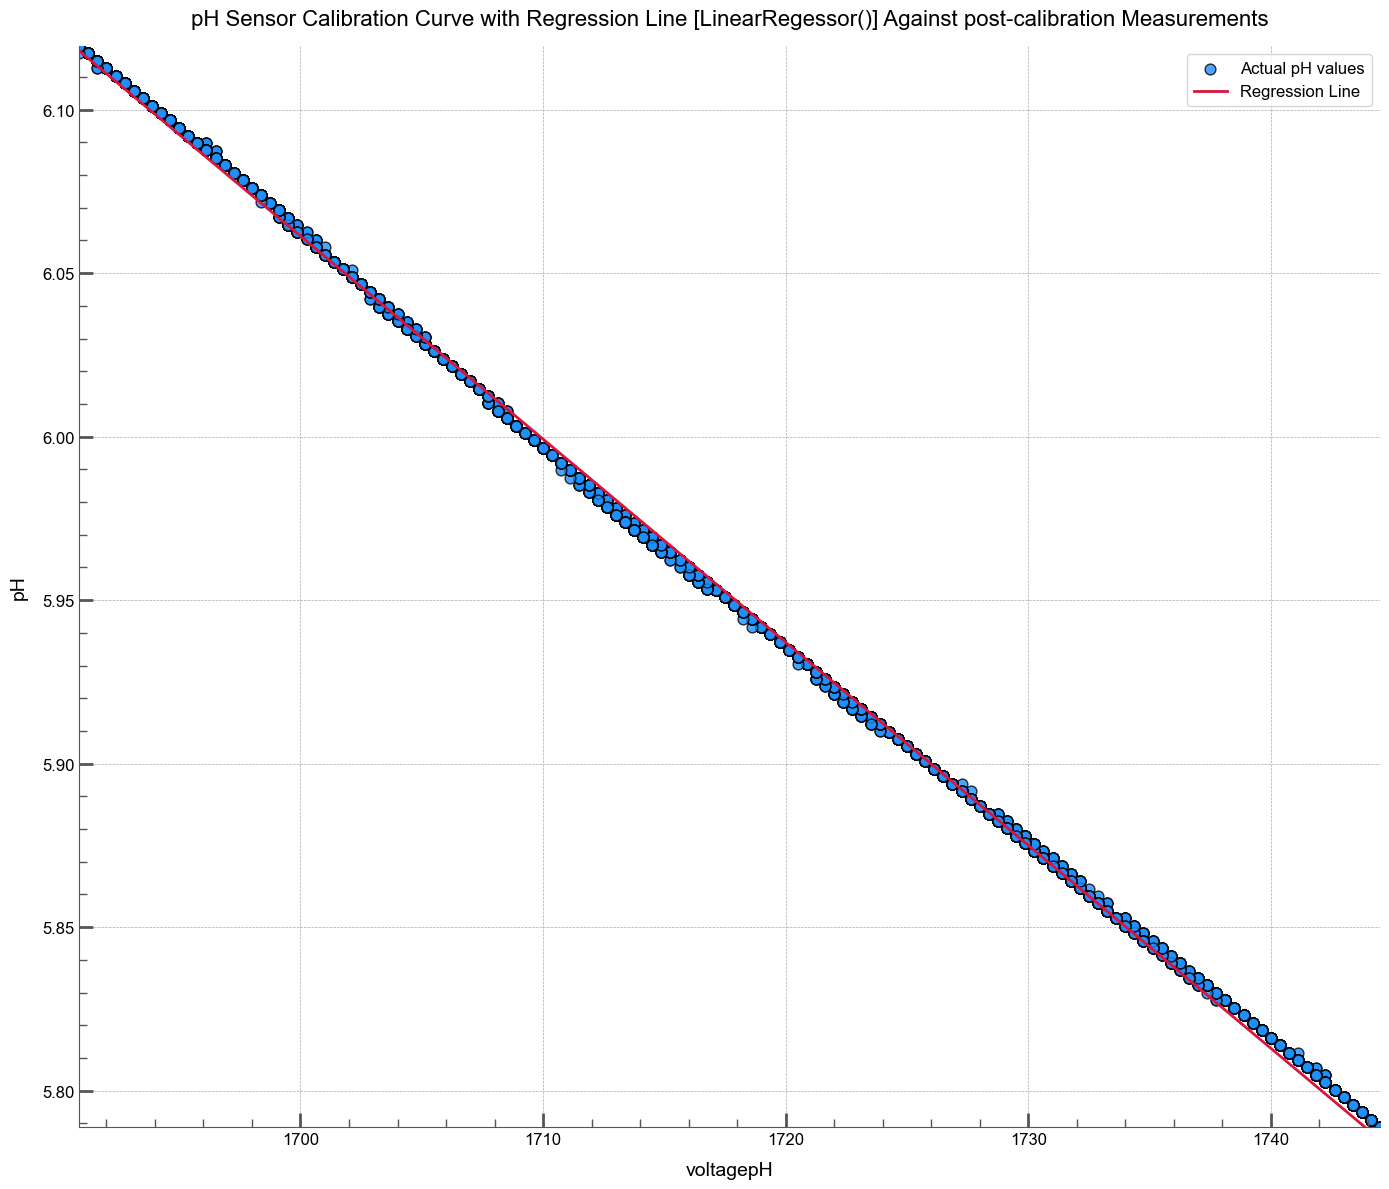

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

voltagePh = voltagePh.reshape(-1, 1)
pH = y_computed.reshape(-1, 1)
print(df.shape)

X = df[['voltagePh']].values
y = df['pH'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

# Print the coefficients and intercept
print("Coefficients: ", linear_model.coef_[0])
print("Intercept: ", linear_model.intercept_)

# Print the performance metrics
print("These metrics apply to the test set:")
print("Mean absolute error: ", np.mean(np.abs(y_test - y_pred)))
print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of determination R²: ", r2_score(y_test, y_pred))

# Regression Line

from aquarel import load_theme
theme = load_theme("scientific")
theme.apply()

# Set the figure size
plt.figure(figsize=(14, 12))

# Create a scatter plot of the actual pH values
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range = linear_model.predict(x_range)
plt.scatter(X, y, label='Actual pH values', s=60, alpha=0.8, color='dodgerblue', edgecolor='black')

# Optional: Create a scatter plot of the test pH values
#plt.scatter(X_test, y_test, label='Test pH values', s=10, alpha=0.5)

# Plot the regression line
plt.plot(x_range, y_range, color='crimson', label='Regression Line', linewidth=2.0)

# Set the axis labels and title
plt.xlabel('voltagepH', fontsize=14, labelpad=10)
plt.ylabel('pH', fontsize=14, labelpad=10)

# Set x and y limits
plt.xlim(X.min(), X.max())
plt.ylim(y.min(), y.max())
plt.xticks(fontsize=12)

# Set legend properties
plt.legend(fontsize=12, loc='best', frameon=True)

# Set title and font size
plt.title('pH Sensor Calibration Curve with Regression Line [LinearRegessor()] Against post-calibration Measurements', fontsize=16, pad=15)

# Set the grid and layout
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

theme.apply_transforms()


In [26]:
print("Test 2 differences in slopes and intercepts")
# Print the coefficients and intercepts of the two models
print("Slope of the Calibration Line: ", slope)
print("Intercept of the Calibration Line: ", intercept)
print("Coefficient of the Model: ", linear_model.coef_[0])
print("Intercept of the Model: ", linear_model.intercept_)
print("Slope difference (calibration - model): ", slope - (linear_model.coef_[0]))
print("Intercept difference (calibration - model): ", intercept - linear_model.intercept_)

Test 2 differences in slopes and intercepts
Slope of the Calibration Line:  -0.006117709351083251
Intercept of the Calibration Line:  16.405221711850075
Coefficient of the Model:  -0.006210053443967956
Intercept of the Model:  16.61844551238495
Slope difference (calibration - model):  9.234409288470542e-05
Intercept difference (calibration - model):  -0.21322380053487677


### It appears we can get more accurate results with a more intensive calibration procedure. However:
- The probe is not consistent over time, and the voltage readings are not consistent.

## TDS EC, Slope, Intercept, and Approximation Calculation

### 🔧 Calibration Procedure

---

#### 1. **Initial Rinse**
- Rinse the **TDS probe** with **deionized** or **battery water**.
- Perform **at least 3 rinses** (preferably 7) to ensure cleanliness.

---

#### 2. **Primary Calibration**
- Calibrate using a **1413 μS/cm conductivity standard solution** (or another appropriate value).
- Perform calibration **at least twice** using the provided calibration code.
> **Note:** This probe has a maximum reading of **1000 ppm** and **2.3 V**.

---

#### 3. **Buffer Measurement**
- Allow the calibration buffer to fill.
- Wait until **50 measurements** are collected, then record the final value.

---

#### 4. **Rinse Again**
- Repeat the rinsing procedure from **Step 1** to cleanse the probe.

---

#### 5. **Low-Point Calibration**
- Calibrate the probe again using **deionized water** with a conductivity of **≤ 10 μS/cm**.

---

#### 6. **Final Rinse**
- Repeat the rinsing procedure from **Step 1** one more time.

---

#### 7. **Record Calibration Values**
- Write the recorded values into your code and assign them to the appropriate variables.

---

#### 💡 Notes
- Used the function from **Seeed Studio** to approximate voltages for:
  - **1413 μS/cm**
  - **5 μS/cm** solutions
- The **1413 μS/cm** value was used to calculate the **voltage multiplier**.


```# if y = 1413 μs/cm, x = 1.73398 V```  
```# if y = 5 μs/cm, x = 0.0058418 V```


Equations in use:

$$
\begin{aligned}
    EC_{\text{value}} &= 133.42 \times V^3 - 255.86 \times V^2 + 857.39 \times V \\
    \text{TempCorrection} &= 1.0 + k_{\text{coefficient}} \times (T - 25.0) \\
    EC_{\text{compensated}} &= \frac{EC_{\text{value}}}{\text{TempCorrection}} \\
    TDS_{\text{value}} &= EC_{\text{compensated}} \times \text{tdsFactor}, \quad \text{where} \quad \text{tdsFactor} = 0.5 \\
    \text{(Optional fitting adjustment)} \\
    \text{Slope} &= \frac{(1413 - 5)}{(V_{1413} - V_5)} \\
    \text{Intercept} &= 0 - \text{Slope} \times V_5 \\
    TDS_{\text{final}} &= \text{Slope} \times TDS_{\text{value}} + \text{Intercept}
\end{aligned}
$$


# TDS Calibration Factors
Includes:

- TDS calibration factors for the TDS probe
- TDS calculation formulas, including temperature compensation
- TDS probe calibration procedures
- brief description of the calibration procedures
- a formula to compute the calibration slope and intercept values using basic Python, with a function to verify TDS calculations (to have a second verification of the C++ code)

1-hour TDS conductivity test variance 1.2819191514726053e-05
            Median
count  4073.000000
mean      1.731821
std       0.003581
min       1.720598
25%       1.728963
50%       1.732309
75%       1.734818
max       1.736491


<Figure size 640x480 with 0 Axes>

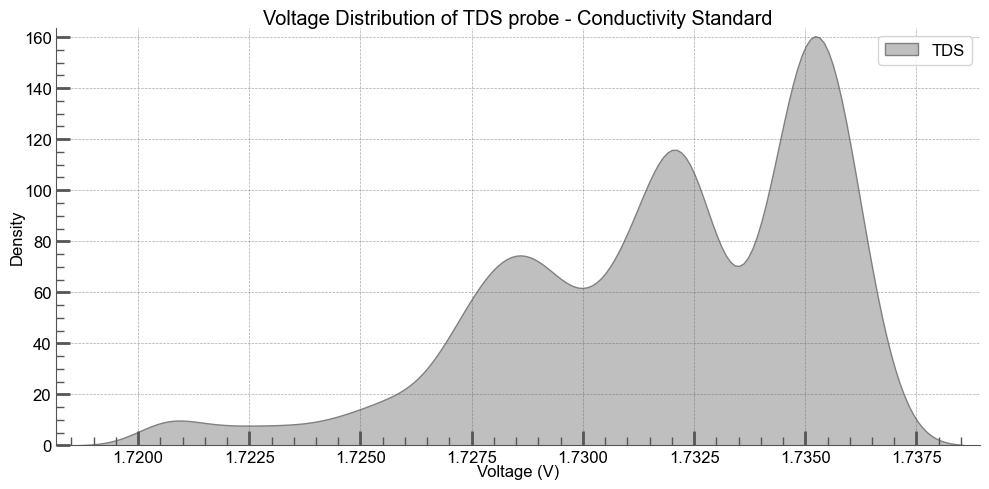

In [27]:
# TDS Density Plot - 1-Hour measurement
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("tds/conductivity_std/1-hour-test/cleaned for numpy/COM4_2025_04_24.08.23.50.163.csv", sep=';')
tds_cal = df['Median'].to_numpy()
tds_cal_std_hr_mean = np.mean(tds_cal)
tds_cal_std_hr_var = np.var(tds_cal)
print("1-hour TDS conductivity test variance", tds_cal_std_hr_var)
print(df.describe())

# Plot the calibration points

from aquarel import load_theme
theme = load_theme("scientific")
theme.apply()

# Set the figure size
plt.figure(figsize=(10, 5))

# Density Plot
sns.kdeplot(tds_cal, label="TDS", color="gray", fill=True, alpha=0.5)

plt.xlabel("Voltage (V)")

# Title
plt.title("Voltage Distribution of TDS probe - Conductivity Standard")


# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Legend
plt.legend(fontsize=12, loc='best', frameon=True)

# Optional: tighter layout
plt.tight_layout()

# Save the figure
save_fig("tds_probe_1-hr_test_conductivity-standard_data_density_plots", tight_layout=True, fig_extension="png", resolution=300)

# Show the plot
plt.show()

theme.apply_transforms()

1-hour TDS conductivity test variance 1.2819191514726053e-05
            Median
count  4073.000000
mean      1.731821
std       0.003581
min       1.720598
25%       1.728963
50%       1.732309
75%       1.734818
max       1.736491


<Figure size 640x480 with 0 Axes>

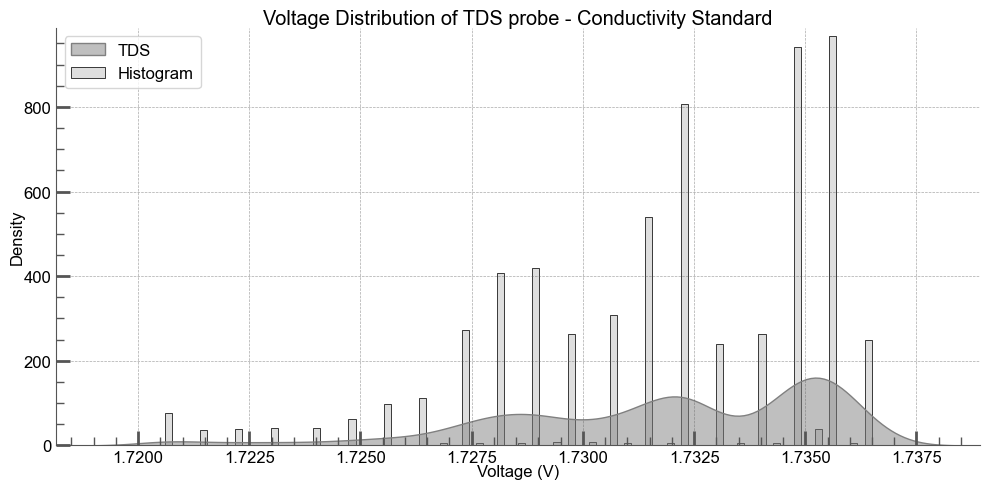

In [28]:
# TDS Density Plot - 1-Hour measurement
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("tds/conductivity_std/1-hour-test/cleaned for numpy/COM4_2025_04_24.08.23.50.163.csv", sep=';')
tds_cal = df['Median'].to_numpy()
tds_cal_std_hr_mean = np.mean(tds_cal)
tds_cal_std_hr_var = np.var(tds_cal)
print("1-hour TDS conductivity test variance", tds_cal_std_hr_var)
print(df.describe())

# Plot the calibration points

from aquarel import load_theme
theme = load_theme("scientific")
theme.apply()

# Set the figure size
plt.figure(figsize=(10, 5))

# Histogram
sns.histplot(tds_cal, bins=100, stat="density", color="lightgray", edgecolor="black", label="Histogram")

# Density Plot
sns.kdeplot(tds_cal, label="TDS", color="gray", fill=True, alpha=0.5)

plt.xlabel("Voltage (V)")

# Title
plt.title("Voltage Distribution of TDS probe - Conductivity Standard")


# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Legend
plt.legend(fontsize=12, loc='best', frameon=True)

# Optional: tighter layout
plt.tight_layout()

# Save the figure
save_fig("tds_probe_1-hr_test_conductivity-standard_data_histogram_density_combined_plot", tight_layout=True, fig_extension="png", resolution=300)

# Show the plot
plt.show()

theme.apply_transforms()

1-hour TDS battery water variance 4.81482486096809e-35
             Median
count  4.130000e+03
mean   3.764070e-02
std    6.939734e-18
min    3.764070e-02
25%    3.764070e-02
50%    3.764070e-02
75%    3.764070e-02
max    3.764070e-02


<Figure size 640x480 with 0 Axes>

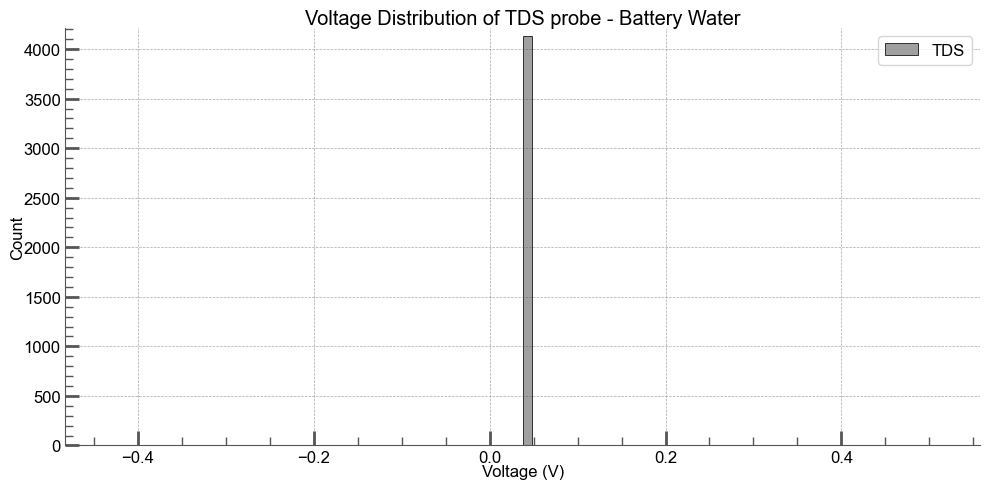

In [29]:
# TDS Scatterplot - 1-Hour measurement
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("tds/battery_water/1-hour-test/cleaned for numpy/COM4_2025_04_24.10.14.08.973.csv", sep=';')
tds_cal = df['Median'].to_numpy()
tds_cal_deion_hr_mean = np.mean(tds_cal)
tds_cal_deion_hr_var = np.var(tds_cal)
print("1-hour TDS battery water variance", tds_cal_deion_hr_var)
print(df.describe())

# Plot the calibration points

from aquarel import load_theme
theme = load_theme("scientific")
theme.apply()

# Set the figure size
plt.figure(figsize=(10, 5))

# Histogram
sns.histplot(tds_cal, bins=100, kde=False, stat="count", color="gray", edgecolor="black", label="TDS")

plt.xlabel("Voltage (V)")

# Title
plt.title("Voltage Distribution of TDS probe - Battery Water")


# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Legend
plt.legend(fontsize=12, loc='best', frameon=True)

# Optional: tighter layout
plt.tight_layout()

# Save the figure
save_fig("tds_probe_1-hr_test_battery-water_data_density_plots", tight_layout=True, fig_extension="png", resolution=300)

# Show the plot
plt.show()

theme.apply_transforms()

In [30]:
import numpy as np

print("These are for the 5 10-minute separated tests.\n")

# Set the acid test values (10-minute test)
cal_tds_test_cond = np.array([1.723944067955, 1.725617051125, 1.728544712067, 1.731472253799, 1.742346167564])
cal_tds_test_cond_mean = np.mean(cal_tds_test_cond)
cal_tds_test_cond_std = np.std(cal_tds_test_cond)
cal_tds_test_cond_var = np.var(cal_tds_test_cond)
print("10-minute tds conductivity mean: ", cal_tds_test_cond_mean)
print("10-minute tds conductivity std: ", cal_tds_test_cond_std)
print("10-minute tds conductivity variance: ", cal_tds_test_cond_var)


# Set the basic test values (10-minute test)
cal_tds_test_deion = np.array([0.037640701979, 0.037640701979, 0.037640701979, 0.037640701979, 0.037640701979])
cal_tds_test_deion_mean = np.mean(cal_tds_test_deion)
cal_tds_test_deion_std = np.std(cal_tds_test_deion)
cal_tds_test_deion_var = np.var(cal_tds_test_deion)
print("10-minute tds battery water mean: ", cal_tds_test_deion_mean)
print("10-minute tds battery water std: ", cal_tds_test_deion_std)
print("10-minute tds battery water variance: ", cal_tds_test_deion_var)
print("")

These are for the 5 10-minute separated tests.

10-minute tds conductivity mean:  1.7303848505019999
10-minute tds conductivity std:  0.0065093356337654505
10-minute tds conductivity variance:  4.237145039300866e-05
10-minute tds battery water mean:  0.037640701979
10-minute tds battery water std:  0.0
10-minute tds battery water variance:  0.0



## Results:

- Here are the results of the 10-minute (tests spaced roughly 10 minutes apart) and 1-hour (an hour long) tests side-by-side.

| 10-minute  | 1-Hour| Solution|
|------------|-------|---------|
| 1.73038    | 1.73182 | 1413 μS/cm   |
| 0.03764    | 0.03764 | < 5 μS/cm  |

In [31]:
# The volts are standard Volts, temperature is in deg C
kCoefficient = 0.019

def ECValue(voltage,temperature):
    # Calculate EC value 
    ECValue = (133.42 * voltage * voltage * voltage - 255.86 * voltage * voltage + 857.39 * voltage)
    tempCorrection = 1.0 + kCoefficient * (temperature - 25.0)
    compensatedEC = ECValue / tempCorrection
    print("EC with voltage: ", voltage, " is: ", compensatedEC)
    return compensatedEC

def TdsValue(ECValue):
    # Calculate initial TDS value, computed from the compensated EC value
    Tds = ECValue * 0.5
    # Apply the linear regression to correct the TDS value 
    # correctedTds = slope * rawTds + intercept
    print("TDS with EC: ", ECValue, " is: ", Tds)
    return Tds

In [32]:
TdsValue(ECValue(tds_cal_std_hr_mean,25))
TdsValue(ECValue(tds_cal_deion_hr_mean,25))

EC with voltage:  1.7318214320621317  is:  1410.4649286192293
TDS with EC:  1410.4649286192293  is:  705.2324643096147
EC with voltage:  0.037640701979000005  is:  31.917368593016587
TDS with EC:  31.917368593016587  is:  15.958684296508293


np.float64(15.958684296508293)

In [33]:
# Define resistor offset (10k resistor between ADS1115 A0 pin and ground)
# EC function is non-linear, and we need to use a function to get the correct value
# using this function: ECValue = (133.42 * voltage * voltage * voltage - 255.86 * voltage * voltage + 857.39 * voltage)
# if y = 1413 μs/cm, x = 1.73398 V
# if y = 5 μs/cm, x = 0.0117039 V
# adjust probe voltage to: voltage * resistancemultiplier, which is multiplier = 1.73398/(rawVoltage for 1413 μs/cm)
# Average probe voltage for 1413 μs/cm before multiplier: 0.499 to 0.550 V
# Average probe voltage for 5 μs/cm before multiplier: 0.014 to 0.012 V
resistancemultiplier = 4.46112

# Set ppm values for conductivity standard and deionized water, as measured by the sensor
# This is from the functions above, and the voltage used is the average of the 10-minute test values
measuredConductivityStandard = 725.0554133420758
measuredDeionizedWater = 16.426849507471218


print("Let's confirm the values...")
print(f'Resistance multiplier: {resistancemultiplier}')
print(f'Conductivity Standard: {measuredConductivityStandard}')
print(f'Deionized Water: {measuredDeionizedWater}')

slope = (706.5 - 2.5) / (measuredConductivityStandard - measuredDeionizedWater)

print(f'Slope: {slope}')

intercept = 0 - slope * measuredDeionizedWater

print(f'Intercept: {intercept}')



Let's confirm the values...
Resistance multiplier: 4.46112
Conductivity Standard: 725.0554133420758
Deionized Water: 16.426849507471218
Slope: 0.9934682793344399
Intercept: -16.31955391507322


In [34]:
# The volts are standard Volts, temperature is in deg C
kCoefficient = 0.019

def ECValue(voltage,temperature):
    # Calculate EC value 
    ECValue = (133.42 * voltage * voltage * voltage - 255.86 * voltage * voltage + 857.39 * voltage)
    tempCorrection = 1.0 + kCoefficient * (temperature - 25.0)
    compensatedEC = ECValue / tempCorrection
    print("EC with voltage: ", voltage, " is: ", compensatedEC)
    return compensatedEC

def TdsValue(ECValue):
    # Calculate initial TDS value, computed from the compensated EC value
    Tds = ECValue * 0.5
    # Apply the linear regression to correct the TDS value 
    Tds = slope * Tds + intercept
    print("TDS with EC: ", ECValue, " is: ", Tds)
    return Tds

In [35]:
TdsValue(ECValue(tds_cal_std_hr_mean,40.0))
TdsValue(ECValue(tds_cal_deion_hr_mean,40.0))

EC with voltage:  1.7318214320621317  is:  1097.638076746482
TDS with EC:  1097.638076746482  is:  528.9147518035725
EC with voltage:  0.037640701979000005  is:  24.83841913853431
TDS with EC:  24.83841913853431  is:  -3.98146315359957


np.float64(-3.98146315359957)

In [36]:
TdsValue(ECValue(tds_cal_std_hr_mean,23.5))
TdsValue(ECValue(0.0376,23.5))

EC with voltage:  1.7318214320621317  is:  1451.8424381052282
TDS with EC:  1451.8424381052282  is:  704.8601505094863
EC with voltage:  0.0376  is:  32.8185606006237
TDS with EC:  32.8185606006237  is:  -0.017454450005885747


-0.017454450005885747

---

**Equation provided by Seeed Studios**

<Figure size 640x480 with 0 Axes>

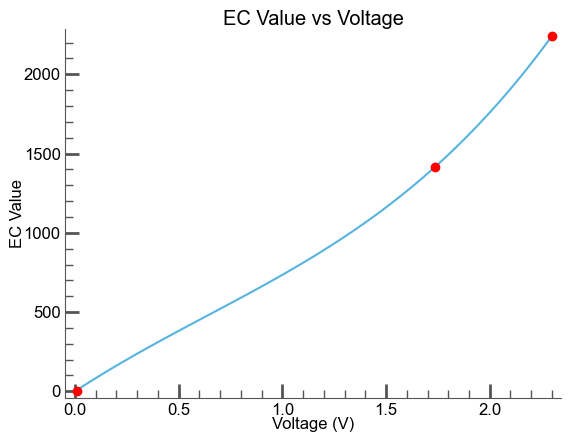

In [37]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 133.42 * x * x * x - 255.86 * x * x + 857.39 * x

plt.figure()
x = np.linspace(0, 2.3, 100)
y = f(x)
plt.plot(x, y)
plt.plot(1.73398, 1413, 'ro')
plt.plot(0.0117039, 5, 'ro')
plt.plot(2.30, 2241.38, 'ro')
plt.xlabel('Voltage (V)')
plt.ylabel('EC Value')
plt.title('EC Value vs Voltage')
plt.grid()
plt.show()

**Note: I did not fully analyze the 1-hour TDS test.**

### Note: My opinion is that the TDS probe could be probably run without the resistor in place (although need to verify ADS1115 configuration requirements), as the voltage would never exceed the 2.3V probe specification. This would eliminate a layer of uncertainty in the readings, and make calibration easier.

## Calibration Code

- Uses a buffer that holds 50 measurements.
- Voltage multiplier factors are determined at calibration time (raw voltage print, then a multiplier to get it to an expected voltage value). Gives a better fit when generating the fitting line.
- pH and Tds must be calibrated separately.

```
#include <Arduino.h>

#include <OneWire.h>
#include <DallasTemperature.h>
#include <ADS1115_WE.h>
#include <Wire.h>
#define I2C_ADDRESS_PH 0x4B
#define I2C_ADDRESS_TDS 0x4A

// GPIO where the DS18B20 is connected to
const int oneWireBus = 5;

// Setup a oneWire instance to communicate with any OneWire devices
OneWire oneWire(oneWireBus);

// Pass our oneWire reference to Dallas Temperature sensor
DallasTemperature sensors(&oneWire);

ADS1115_WE adc_ph = ADS1115_WE(I2C_ADDRESS_PH);
ADS1115_WE adc_tds = ADS1115_WE(I2C_ADDRESS_TDS);

float acidVoltage = 2063.5501807228916;                                  // buffer solution 4.01 at 25C
float neutralVoltage = 1537.376356427379;                               // buffer solution 7.0 at 25C
float baseVoltage = 1078.2311577652847;                                  // buffer solution 10.0 at 25C
float referenceTemp = 25.0;                             // reference temperature of 25 deg C
float measuredConductivityStandard = 725.9212190526141; // Measured conductivity standard for calibration
float measuredDeionizedWater = 16.42684950747122;      // Measured deionized water for calibration
int iterations = 50;
float *analogBufferPH;
float *analogBufferTDS;
int analogBufferIndexPH = 0;
int analogBufferIndexTDS = 0;
int analogBufferCountPH = 0;
int analogBufferCountTDS = 0;

void setup()
{
  Wire.begin();
  Serial.begin(9600);

  pinMode(23, OUTPUT);
  digitalWrite(23, HIGH);
  pinMode(19, OUTPUT);
  digitalWrite(19, HIGH);

  if (!adc_ph.init())
  {
    Serial.print("ADS1115 No 1 not connected!");
  }
  adc_ph.setVoltageRange_mV(ADS1115_RANGE_6144);
  adc_ph.setMeasureMode(ADS1115_CONTINUOUS);
  adc_ph.setCompareChannels(ADS1115_COMP_0_GND);

  if (!adc_tds.init())
  {
    Serial.print("ADS1115 No 2 not connected!");
  }
  adc_tds.setVoltageRange_mV(ADS1115_RANGE_6144);
  adc_tds.setMeasureMode(ADS1115_CONTINUOUS);
  adc_tds.setCompareChannels(ADS1115_COMP_0_GND);

  pinMode(18, OUTPUT);
  digitalWrite(18, HIGH);
  sensors.begin();

  // Allocate memory for analog buffer
  analogBufferPH = new float[iterations];
  analogBufferTDS = new float[iterations];
  for (int i = 0; i < iterations; i++)
  {
    analogBufferPH[i] = 0.0;
    analogBufferTDS[i] = 0.0;
  }
}

void loop()
{
  sensors.requestTemperatures(); // Send the command to get temperatures

  // Read temperature in Celsius

  float temperatureC = sensors.getTempCByIndex(0);

  // Read PH
  float voltagePH = adc_ph.getResult_mV();
  float probeVoltagePH = voltagePH * 2;
  analogBufferPH[analogBufferIndexPH] = probeVoltagePH;
  analogBufferIndexPH = (analogBufferIndexPH + 1) % iterations;
  if (analogBufferCountPH < iterations)
    analogBufferCountPH++;

  // Read TDS
  float voltageTDS = adc_tds.getResult_V();
  float probeVoltageTDS = voltageTDS * 4.46112;
  analogBufferTDS[analogBufferIndexTDS] = probeVoltageTDS;
  analogBufferIndexTDS = (analogBufferIndexTDS + 1) % iterations;
  if (analogBufferCountTDS < iterations)
    analogBufferCountTDS++;

  if (analogBufferCountPH >= iterations && analogBufferCountTDS >= iterations)
  {
    // Median filtering
    float sortedPH[iterations], sortedTDS[iterations];
    memcpy(sortedPH, analogBufferPH, sizeof(float) * iterations);
    memcpy(sortedTDS, analogBufferTDS, sizeof(float) * iterations);
    std::sort(sortedPH, sortedPH + iterations);
    std::sort(sortedTDS, sortedTDS + iterations);
    float medianPH = sortedPH[iterations / 2];
    float medianTDS = sortedTDS[iterations / 2];

    // pH calculation
    double slopePH = ((7.0 - 4.0) / (neutralVoltage - acidVoltage) +
                      (7 - 10.0) / (neutralVoltage - baseVoltage)) /
                     2;
    double interceptPH = 7.0 - slopePH * (neutralVoltage);
    double compensatedSlopePH = slopePH * ((temperatureC + 273.15) / (referenceTemp + 273.15));
    double pHValue = compensatedSlopePH * medianPH + interceptPH;

    // TDS calculation
    float kCoefficient = 0.019;
    double rawEC = (133.42 * medianTDS * medianTDS * medianTDS - 255.86 * medianTDS * medianTDS + 857.39 * medianTDS);
    double tempCorrection = 1.0 + kCoefficient * (temperatureC - referenceTemp);
    double compensatedEC = rawEC / tempCorrection;
    double tdsValue = compensatedEC * 0.5;
    // double slopeTDS = (706.5 - 2.5) / (measuredConductivityStandard - measuredDeionizedWater);
    // double interceptTDS = 0 - slopeTDS * measuredDeionizedWater;
    // double tdsValue = slopeTDS * rawTds + interceptTDS; //y = k*x + b

    // Output as CSV-style line
    Serial.print(medianPH, 4);
    Serial.print(";");
    Serial.print(medianPH / 2, 4);
    Serial.print(";");
    Serial.print(pHValue, 4);
    Serial.print(";");
    Serial.print(medianTDS, 4);
    Serial.print(";");
    Serial.print(medianTDS / 4.46112, 4);
    Serial.print(";");
    Serial.print(tdsValue, 4);
    Serial.print(";");
    Serial.print(temperatureC, 2);
    Serial.print(";");

    if (0.001 < medianTDS && medianTDS < 0.09)
      Serial.print("Water:Deionized;");
    else if (1.5 < medianTDS && medianTDS < 1.9)
      Serial.print("Water:Standard;");
    else
      Serial.print("Water:Unknown;");

    if (1450 < medianPH && medianPH < 1600)
      Serial.print("PH:Neutral;");
    else if (900 < medianPH && medianPH < 1050)
      Serial.print("PH:Basic;");
    else if (1950 < medianPH && medianPH < 2100)
      Serial.print("PH:Acidic;");
    else
      Serial.print("PH:Unknown;");

    Serial.println();
  }

  delay(100);
}
```

---
### Additional Calculations

---

### Second Test used these fitting functions:

- Test started 01.04.2025.

- PH:

```
Let's confirm the values...
Resistance multiplier: 2
Neutral voltage: 1577.82
Acid voltage: 2086.0
Base voltage: 1123.5
Slope: -0.006243508602849564
Intercept: 16.851132743748096
Compensated slope: -0.006243508602849564
```

_Results in_:
$ y = -0.006243508602849564 * x + 16.851132743748096 $

- TDS:

```
Let's confirm the values...
Resistance multiplier: 3.33457692
Conductivity Standard: 665.76
Deionized Water: 16.23
Slope: 1.0838606376918696
Intercept: -17.591058149739045
```

_Results in_:
$ y = 1.0838606376918696 * x - 17.591058149739045 $

- The factor __rawTds__ in the data saved to the SD Card and to Thinger.io is before applying this function. The data __finalTds__ includes the calculation with this function.

### Third Test used these fitting functions:

- Test conducted over a sporadic period between 16.04.2025 and 24.04.2025.

- PH:

```
Let's confirm the values...
Neutral voltage: 1537.376356427379
Acid voltage: 2063.5501807228916
Base voltage: 1078.2311577652847
Slope: -0.006117709351083251
Theoretical Intercept using Acid Voltage (not used in prod. code): 16.624200237037968
Theoretical Intercept using Base Voltage (not used in prod. code): 16.596304836490003
Actual Intercept using Neutral Voltage (used in prod. code): 16.405221711850075
Compensated slope: -0.006117709351083251
```

_Results in_:
$ y = -0.006117709351083251 * x + 16.405221711850075 $

- TDS:

```
Let's confirm the values...
Resistance multiplier: 4.46112
Conductivity Standard: 725.0554133420758
Deionized Water: 16.426849507471218
Slope: 0.9934682793344399
Intercept: -16.31955391507322
```

_Results in_:
$ y = 0.9934682793344399 * x - 16.31955391507322 $

**Compare the results between the tests.**